#0) Imports and Installs

In [1]:
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt


# 1) [Code Snippet 1] IPOs data from Web

* learn dataframes "stacking" (UNION ALL)
* learn about type casting
* generate new columns (simple and with function)


In [3]:
import pandas as pd
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/2023/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

C:\Users\rahul\AppData\Local\Temp\ipykernel_34532\4213396001.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  ipo_dfs = pd.read_html(response.text)


In [4]:
ipos_2023 = ipo_dfs[0]
ipos_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      154 non-null    object
 1   Symbol        154 non-null    object
 2   Company Name  154 non-null    object
 3   IPO Price     154 non-null    object
 4   Current       154 non-null    object
 5   Return        154 non-null    object
dtypes: object(6)
memory usage: 7.3+ KB


In [5]:
url = "https://stockanalysis.com/ipos/2024/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

C:\Users\rahul\AppData\Local\Temp\ipykernel_34532\1522156903.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  ipo_dfs = pd.read_html(response.text)


In [6]:
ipos_2024 = ipo_dfs[0]
ipos_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      225 non-null    object
 1   Symbol        225 non-null    object
 2   Company Name  225 non-null    object
 3   IPO Price     225 non-null    object
 4   Current       225 non-null    object
 5   Return        225 non-null    object
dtypes: object(6)
memory usage: 10.7+ KB


In [7]:
# "stacking dataframes"
# pd.concat() is used to concatenate the DataFrames vertically.
# The ignore_index=True parameter ensures that the resulting DataFrame has a new index,
# ignoring the original indices of the input DataFrames.
# The stacked_df now contains the concatenated DataFrame.
stacked_ipos_df = pd.concat([ipos_2024, ipos_2023], ignore_index=True)

In [8]:
stacked_ipos_df.head(1)

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,"Dec 31, 2024",ONEG,OneConstruction Group Limited,$4.00,$5.05,22.53%


In [9]:
# Need to convert everything to a proper type (date, str, int, float, etc.)
stacked_ipos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      379 non-null    object
 1   Symbol        379 non-null    object
 2   Company Name  379 non-null    object
 3   IPO Price     379 non-null    object
 4   Current       379 non-null    object
 5   Return        379 non-null    object
dtypes: object(6)
memory usage: 17.9+ KB


In [10]:
# convert to datetime
stacked_ipos_df['IPO Date'] = pd.to_datetime(stacked_ipos_df['IPO Date'])

In [11]:
# Problem --> not always the columns are filled
missing_prices_df = stacked_ipos_df[stacked_ipos_df['IPO Price'].astype(str).str.find('-') >= 0]
missing_prices_df

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
61,2024-10-11,STFS,Star Fashion Culture Holdings Limited,-,$1.16,-
120,2024-07-23,ZDAI,Primega Group Holdings Limited,-,$0.87,-
148,2024-05-31,NAKA,"Kindly MD, Inc.",-,$14.24,-
174,2024-04-17,SUPX,SuperX AI Technology Limited,-,$9.79,-


In [12]:
# it has some missing values --> use defensive errors='coerce' (if don't have time to crack into the data errors)
#     : pd.to_numeric() function call, which will convert problematic values to NaN.
#     otherwise you'll get a ValueError: Unable to parse string "-" at position 9
stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'].str.replace('$', ''), errors='coerce')
# not sure why, but need to call it again to transform 'object' to 'float64'
stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'])

In [13]:
# Convert "Current" column
stacked_ipos_df['Current'] = pd.to_numeric(stacked_ipos_df['Current'].str.replace('$', ''), errors='coerce')

# Convert 'Return' to numeric format (percentage)
stacked_ipos_df['Return'] = pd.to_numeric(stacked_ipos_df['Return'].str.replace('%', ''), errors='coerce') / 100

In [14]:
# Correctly applied transformations with 'defensive' techniques, but now not all are non-null
stacked_ipos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   IPO Date      379 non-null    datetime64[ns]
 1   Symbol        379 non-null    object        
 2   Company Name  379 non-null    object        
 3   IPO Price     375 non-null    float64       
 4   Current       379 non-null    float64       
 5   Return        374 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 17.9+ KB


In [15]:
# simple way of checking NULLs
# (you need to understand how vector operations work .isnull() and calls chaining .isnull().sum())
stacked_ipos_df.isnull().sum()

IPO Date        0
Symbol          0
Company Name    0
IPO Price       4
Current         0
Return          5
dtype: int64

In [16]:
# Do you want to leave the record or not?
stacked_ipos_df[stacked_ipos_df.Return.isnull()]

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
61,2024-10-11,STFS,Star Fashion Culture Holdings Limited,NaN,1.16,NaN
120,2024-07-23,ZDAI,Primega Group Holdings Limited,NaN,0.87,NaN
148,2024-05-31,NAKA,"Kindly MD, Inc.",NaN,14.24,NaN
174,2024-04-17,SUPX,SuperX AI Technology Limited,NaN,9.79,NaN
289,2023-07-25,JNVR,Janover Inc.,4.0,79.31,NaN


In [17]:
# now you can operate with columns as a numeric type
stacked_ipos_df['IPO Price'].mean()

np.float64(10.860186666666667)

In [18]:
# generate a new field -- SIMPLE calculation (no function needed)
stacked_ipos_df['Price Increase'] = stacked_ipos_df['Current'] - stacked_ipos_df['IPO Price']

In [19]:
stacked_ipos_df.head(1)

,IPO Date,Symbol,Company Name,IPO Price,Current,Return,Price Increase
0,2024-12-31,ONEG,OneConstruction Group Limited,4.0,5.05,0.2253,1.05


In [20]:
# Descriptive Analytics of a dataset
stacked_ipos_df.describe()

,IPO Date,IPO Price,Current,Return,Price Increase
count,379,375.000000,379.000000,374.000000,375.00000
mean,2024-02-11 21:43:13.139841536,10.860187,11.307942,-0.153834,0.49888
min,2023-01-13 00:00:00,2.500000,0.000000,-0.999500,-49.51000
25%,2023-08-01 00:00:00,4.000000,1.355000,-0.769500,-3.99000
50%,2024-03-21 00:00:00,10.000000,4.590000,-0.403900,-2.26000
75%,2024-09-05 00:00:00,12.750000,11.070000,0.076300,0.77500
max,2024-12-31 00:00:00,92.000000,145.000000,8.270000,105.61000
std,NaN,10.495631,18.623091,0.959766,13.83503


In [21]:
# some visualisation: bar chart using Plotly Express
import plotly.express as px

# Truncate to the first day in the month - for Bar names
stacked_ipos_df['Date_monthly'] = stacked_ipos_df['IPO Date'].dt.to_period('M').dt.to_timestamp()

# Count the number of deals for each month and year
monthly_deals = stacked_ipos_df['Date_monthly'].value_counts().reset_index().sort_values(by='Date_monthly')
monthly_deals.columns = ['Date_monthly', 'Number of Deals']

# Plotting the bar chart using Plotly Express
fig = px.bar(monthly_deals,
             x='Date_monthly',
             y='Number of Deals',
             labels={'Month_Year': 'Month and Year', 'Number of Deals': 'Number of Deals'},
             title='Number of IPO Deals per Month and Year',
             text='Number of Deals'
             )
fig.update_traces(textposition='outside', # Position the text outside the bars
                  textfont=dict(color='black',size=14), # Adjust the font size of the text
                  )
fig.update_layout(title_x=0.5) # Center the title

fig.show()

In [22]:
# To be used for home assignment: 'You can notice a bump in the price after the IPO? And after that the price goes down
# You're asked to design a simple strategy to buy and hold for X days (at 'Adj.Close' price, no fees)
# Find an optimal X between 1 and 30, that delivers you a MAX mean return on ALL 2023 IPOs?
# Write down the answer X (a number between 1 and 30)

# What is the distribution of other returns 25-50-75% quantiles? Compare mean and median returns for 2023 (median may be more robust),
  # are you losing money in 25% cases (if 25% quantile returns is < 0)
  # Try the same X for all deals in 2024.  How the mean return in 2024 (out of sample data) is different from 2023 data?

# REDDIT - recent IPO
# https://finance.yahoo.com/quote/RDDT/
reddit = yf.download(tickers = "RDDT",
                     period = "max",
                     interval = "1d")

reddit.tail()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RDDT,RDDT,RDDT,RDDT,RDDT
Date,,,,,
2025-06-13,118.180000,120.300003,112.300003,112.300003,6509200
2025-06-16,126.199997,126.589996,121.425003,121.425003,8405100
2025-06-17,133.839996,146.164001,132.410004,133.649994,23521800
2025-06-18,141.160004,143.889999,132.250000,132.320007,12180700
2025-06-20,139.089996,147.998993,138.130005,141.509995,7798911


In [24]:
print(reddit.columns)


MultiIndex([( 'Close', 'RDDT'),
            (  'High', 'RDDT'),
            (   'Low', 'RDDT'),
            (  'Open', 'RDDT'),
            ('Volume', 'RDDT')],
           names=['Price', 'Ticker'])


In [25]:
reddit = yf.download("RDDT", start="2024-03-21")


[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': "Reddit's (RDDT) price after the IPO"}, xlabel='Date'>

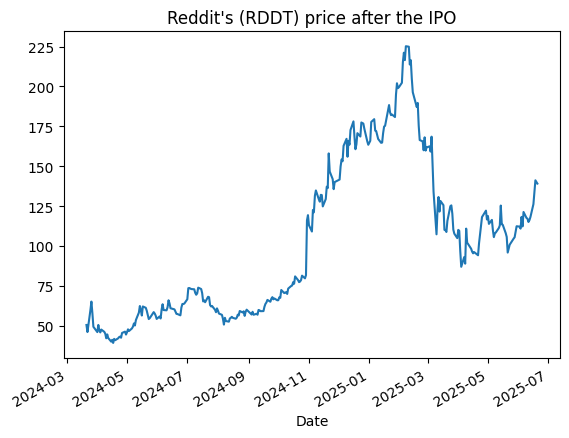

In [27]:
reddit_close = reddit[('Close', 'RDDT')]
reddit_close.plot.line(title="Reddit's (RDDT) price after the IPO")


#2) OHLCV data transformations

## 2.1 [Code Snippet 2] Time series for OHLCV

In [28]:
nvo_df = yf.download(tickers = "NVO",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [29]:
# big plus of an API's data: good typing from the box!
# notice DatetimeIndex - it is a recognised date
nvo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11126 entries, 1981-04-30 to 2025-06-20
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, NVO)   11126 non-null  float64
 1   (High, NVO)    11126 non-null  float64
 2   (Low, NVO)     11126 non-null  float64
 3   (Open, NVO)    11126 non-null  float64
 4   (Volume, NVO)  11126 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 521.5 KB


In [30]:
nvo_df.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVO,NVO,NVO,NVO,NVO
Date,,,,,
2025-06-13,79.830002,81.440002,79.430000,81.410004,7491800
2025-06-16,77.019997,78.379997,76.620003,77.839996,8181900
2025-06-17,74.339996,75.779999,74.139999,75.510002,8080000
2025-06-18,74.010002,74.820000,73.699997,74.559998,5462300
2025-06-20,73.785004,74.379997,72.739998,73.839996,7553861


In [31]:
# filter on date (index)
nvo_df_filtered_from_2020 = nvo_df[nvo_df.index>='2020-01-01']
nvo_df_filtered_from_2024 = nvo_df[nvo_df.index>='2024-01-01']

In [34]:
print(nvo_df.columns)

MultiIndex([( 'Close', 'NVO'),
            (  'High', 'NVO'),
            (   'Low', 'NVO'),
            (  'Open', 'NVO'),
            ('Volume', 'NVO')],
           names=['Price', 'Ticker'])


<Axes: title={'center': 'Novo Nordisk A/S (NVO) price daily'}, xlabel='Date'>

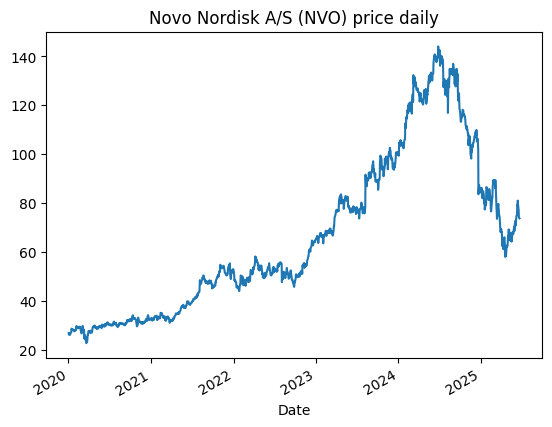

In [36]:
nvo_df_filtered_from_2020[('Close', 'NVO')].plot.line(title='Novo Nordisk A/S (NVO) price daily')


In [37]:
# generating new fields (using DateTime features):

nvo_df['Ticker'] = 'NVO'
nvo_df['Year']= nvo_df.index.year
nvo_df['Month'] = nvo_df.index.month
nvo_df['Weekday'] = nvo_df.index.weekday
nvo_df['Date'] = nvo_df.index.date # to be used in joins

In [38]:
nvo_df.tail()

Price,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,Date
Ticker,NVO,NVO,NVO,NVO,NVO,,,,,
Date,,,,,,,,,,
2025-06-13,79.830002,81.440002,79.430000,81.410004,7491800,NVO,2025,6,4,2025-06-13
2025-06-16,77.019997,78.379997,76.620003,77.839996,8181900,NVO,2025,6,0,2025-06-16
2025-06-17,74.339996,75.779999,74.139999,75.510002,8080000,NVO,2025,6,1,2025-06-17
2025-06-18,74.010002,74.820000,73.699997,74.559998,5462300,NVO,2025,6,2,2025-06-18
2025-06-20,73.785004,74.379997,72.739998,73.839996,7553861,NVO,2025,6,4,2025-06-20


In [41]:
nvo_df['close_nvo'] = nvo_df[('Close', 'NVO')]
nvo_df['close_nvo_minus_1'] = nvo_df['close_nvo'].shift(-1)
nvo_df['close_nvo_plus_1'] = nvo_df['close_nvo'].shift(1)


In [46]:
# Flatten columns
nvo_df.columns = [f"{col[0].lower()}_{col[1].lower()}" for col in nvo_df.columns]

# Use the flattened version
nvo_df['growth_1d'] = nvo_df['close_nvo'] / nvo_df['close_nvo'].shift(1)
nvo_df['growth_30d'] = nvo_df['close_nvo'] / nvo_df['close_nvo'].shift(30)
nvo_df['growth_future_1d'] = nvo_df['close_nvo'].shift(-1) / nvo_df['close_nvo']
nvo_df['is_positive_growth_1d_future'] = np.where(nvo_df['growth_future_1d'] > 1, 1, 0)


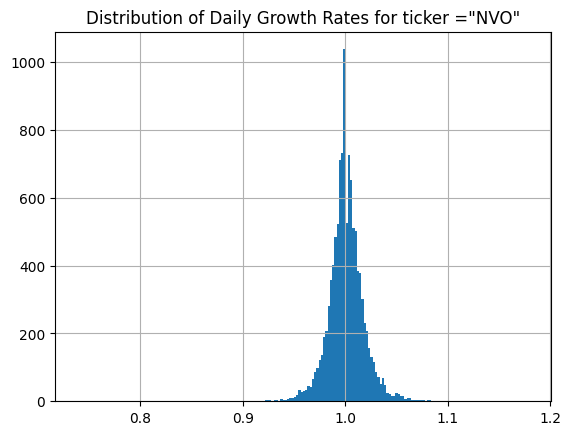

In [49]:
# normally the growth in 1 day is +-10%, while a lot of it is around 0% (around 1.)
plt.title('Distribution of Daily Growth Rates for ticker ="NVO"')
nvo_df.growth_1d.hist(bins=200)
plt.show()

<Axes: title={'center': 'Distribution of 2-days Growth Rates for ticker = "NVO"'}>

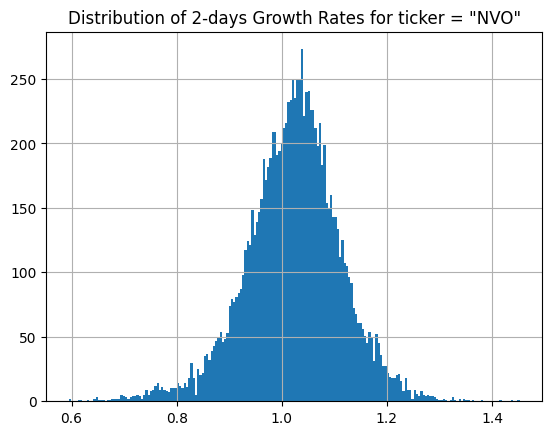

In [50]:
# you can see that the growth is can be much wider in 30 days (+- 30%)
plt.title('Distribution of 2-days Growth Rates for ticker = "NVO"')

nvo_df.growth_30d.hist(bins=200)

In [51]:
# for modeling: we use growth_1d, growth_2d as feature
COLUMNS = [k for k in nvo_df.keys() if k.find('growth')>=0 or k=='Adj Close']
nvo_df[COLUMNS].tail()

,growth_1d_,growth_30d_,growth_future_1d_,is_positive_growth_1d_future_,growth_1d,growth_30d,growth_future_1d,is_positive_growth_1d_future
Date,,,,,,,,
2025-06-13,0.984948,1.216921,0.964800,0,0.984948,1.216921,0.964800,0
2025-06-16,0.964800,1.112523,0.965204,0,0.964800,1.112523,0.965204,0
2025-06-17,0.965204,1.075521,0.995561,0,0.965204,1.075521,0.995561,0
2025-06-18,0.995561,1.116458,0.996960,0,0.995561,1.116458,0.996960,0
2025-06-20,0.996960,1.092302,NaN,0,0.996960,1.092302,NaN,0


In [52]:
# Calculate the distribution if future growth
nvo_df.is_positive_growth_1d_future.value_counts() / len(nvo_df)

is_positive_growth_1d_future
0    0.513033
1    0.486967
Name: count, dtype: float64

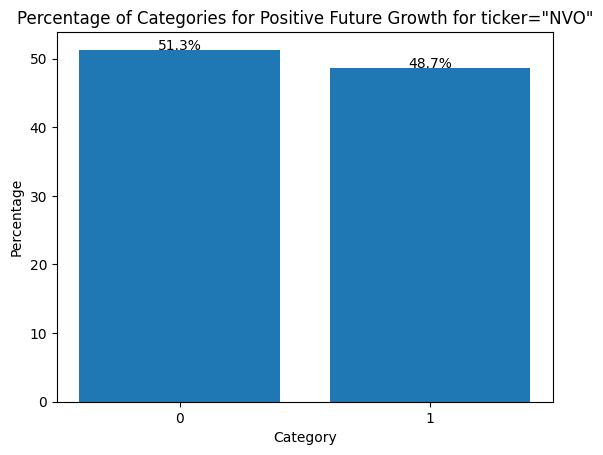

In [53]:
# Calculate value counts
value_counts = nvo_df['is_positive_growth_1d_future'].value_counts()

# Calculate percentage of each category
percentage = (value_counts / len(nvo_df)) * 100

# Plot as a bar chart
plt.bar(percentage.index.astype(str), percentage)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Categories for Positive Future Growth for ticker="NVO"')

# Add percentage values on top of each bar
for i, value in enumerate(percentage):
    plt.text(i, value + 0, f'{value:.1f}%', ha='center')

plt.show()

## 2.2) [Code Snippet 6] Candlestick chart for OHLCV

In [56]:
# Candlestick charts : https://plotly.com/python/candlestick-charts/

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=nvo_df_filtered_from_2020.index,
    open=nvo_df_filtered_from_2020[('Open', 'NVO')],
    high=nvo_df_filtered_from_2020[('High', 'NVO')],
    low=nvo_df_filtered_from_2020[('Low', 'NVO')],
    close=nvo_df_filtered_from_2020[('Close', 'NVO')]
)])

fig.update_layout(
    title="NVO's daily candlestick chart from 2020",
    title_x=0.5,
    xaxis_rangeslider_visible=True
)

fig.show()


# 3) Macro Indicators

## 3.0) Previous indicators from module 1

In [57]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2025; month= 6; day=20
Period for indexes: 1955-06-20 to 2025-06-20 


In [58]:
# reuse code for ealier covered indicators
dax_daily = yf.download(tickers = "^GDAXI",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [60]:
print(dax_daily.columns.tolist())


[('Close', '^GDAXI'), ('High', '^GDAXI'), ('Low', '^GDAXI'), ('Open', '^GDAXI'), ('Volume', '^GDAXI')]


In [61]:
dax_daily.columns = [f"{col[0].lower()}_{col[1].lower()}" for col in dax_daily.columns]

for i in [1, 3, 7, 30, 90, 365]:
    dax_daily['growth_dax_' + str(i) + 'd'] = dax_daily['close_^gdaxi'] / dax_daily['close_^gdaxi'].shift(i)


In [62]:
dax_daily.head()

,close_^gdaxi,high_^gdaxi,low_^gdaxi,open_^gdaxi,volume_^gdaxi,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
Date,,,,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,0,NaN,NaN,NaN,NaN,NaN,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,0,0.951551,NaN,NaN,NaN,NaN,NaN
1988-01-05,996.099976,996.099976,996.099976,996.099976,0,1.041412,NaN,NaN,NaN,NaN,NaN
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,0,1.009949,1.000816,NaN,NaN,NaN,NaN
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,0,1.008409,1.060617,NaN,NaN,NaN,NaN


In [63]:
dax_daily.tail(2)

,close_^gdaxi,high_^gdaxi,low_^gdaxi,open_^gdaxi,volume_^gdaxi,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
Date,,,,,,,,,,,
2025-06-19,23057.380859,23254.859375,23051.550781,23178.599609,41395300,0.988831,0.972921,0.961222,0.987354,1.052284,1.381524
2025-06-20,23350.550781,23481.970703,23187.480469,23197.119141,0,1.012715,0.996411,0.975016,0.993669,1.059567,1.411163


In [64]:
GROWTH_KEYS = [k for k in dax_daily.keys() if k.startswith('growth')]
dax_daily_to_merge = dax_daily[GROWTH_KEYS]
dax_daily_to_merge.tail(1)

,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
Date,,,,,,
2025-06-20,1.012715,0.996411,0.975016,0.993669,1.059567,1.411163


In [66]:
def get_growth_df(df:pd.DataFrame, prefix:str)->pd.DataFrame:
  for i in [1,3,7,30,90,365]:
    df['growth_'+prefix+'_'+str(i)+'d'] = df['Adj Close'] / df['Adj Close'].shift(i)
    GROWTH_KEYS = [k for k in df.keys() if k.startswith('growth')]
  return df[GROWTH_KEYS]

In [67]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [69]:
print(snp500_daily.columns.tolist())


[('Close', '^GSPC'), ('High', '^GSPC'), ('Low', '^GSPC'), ('Open', '^GSPC'), ('Volume', '^GSPC')]


In [70]:
def get_growth_df(df, prefix, price_col=('Close', '^GSPC')):
    out = df.copy()
    for i in [1, 3, 7, 30, 90, 365]:
        out[f'growth_{prefix}_{i}d'] = df[price_col] / df[price_col].shift(i)
    return out


In [71]:
snp500_to_merge = get_growth_df(snp500_daily, 'snp500', price_col=('Close', '^GSPC'))


In [72]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
dji_daily = yf.download(tickers = "^DJI",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [74]:
print(dji_daily.columns.tolist())


[('Close', '^DJI'), ('High', '^DJI'), ('Low', '^DJI'), ('Open', '^DJI'), ('Volume', '^DJI')]


In [75]:
def get_growth_df(df, prefix, ticker_symbol='^DJI', price_field='Close'):
    """
    Computes past growth features from a given price field in a MultiIndex DataFrame.

    Args:
        df: DataFrame with MultiIndex columns (e.g., from yfinance).
        prefix: Prefix to use in new column names.
        ticker_symbol: The stock index/ticker symbol inside the MultiIndex.
        price_field: Which price field to use (e.g., 'Close' or 'Adj Close').

    Returns:
        DataFrame with growth features.
    """
    out = df.copy()

    try:
        price_series = df[(price_field, ticker_symbol)]
    except KeyError:
        raise KeyError(f"Column ({price_field}, {ticker_symbol}) not found in the DataFrame.")

    for i in [1, 3, 7, 30, 90, 365]:
        out[f'growth_{prefix}_{i}d'] = price_series / price_series.shift(i)

    return out


In [76]:
dji_daily_to_merge = get_growth_df(dji_daily,'dji')
dji_daily_to_merge.tail(2)

Price,Close,High,Low,Open,Volume,growth_dji_1d,growth_dji_3d,growth_dji_7d,growth_dji_30d,growth_dji_90d,growth_dji_365d
Ticker,^DJI,^DJI,^DJI,^DJI,^DJI,,,,,,
Date,,,,,,,,,,,
2025-06-18,42171.660156,42510.070312,42118.230469,42236.031250,485440000,0.998954,0.999381,0.986200,1.032885,0.951883,1.126675
2025-06-20,42206.820312,42432.191406,42089.988281,42291.101562,859431452,1.000834,0.992749,0.984602,1.026581,0.949099,1.127309


In [77]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI
epi_etf_daily = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")
epi_etf_daily.tail(2)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,EPI,EPI,EPI,EPI,EPI
Date,,,,,
2025-06-18,45.880001,45.970001,45.770000,45.869999,720200
2025-06-20,45.880001,46.110001,45.849998,46.090000,963857


In [79]:
print(epi_etf_daily.columns.tolist())


[('Close', 'EPI'), ('High', 'EPI'), ('Low', 'EPI'), ('Open', 'EPI'), ('Volume', 'EPI')]


In [80]:
epi_etf_daily_to_merge = get_growth_df(epi_etf_daily, 'epi', ticker_symbol='EPI')


In [81]:
def get_growth_df(df, prefix, ticker_symbol, price_field='Close'):
    """
    Computes past growth features from a given price field in a MultiIndex DataFrame.

    Args:
        df: DataFrame with MultiIndex columns (e.g., from yfinance).
        prefix: Prefix to use in new column names.
        ticker_symbol: The stock/index/ETF symbol in the MultiIndex.
        price_field: Which price field to use (e.g., 'Close' or 'Adj Close').

    Returns:
        DataFrame with growth features.
    """
    out = df.copy()

    try:
        price_series = df[(price_field, ticker_symbol)]
    except KeyError:
        raise KeyError(f"Column ({price_field}, {ticker_symbol}) not found in the DataFrame.\nAvailable columns: {df.columns.tolist()}")

    for i in [1, 3, 7, 30, 90, 365]:
        out[f'growth_{prefix}_{i}d'] = price_series / price_series.shift(i)

    return out


In [82]:
epi_etf_daily_to_merge = get_growth_df(epi_etf_daily, 'epi', ticker_symbol='EPI')
epi_etf_daily_to_merge.tail(2)


Price,Close,High,Low,Open,Volume,growth_epi_1d,growth_epi_3d,growth_epi_7d,growth_epi_30d,growth_epi_90d,growth_epi_365d
Ticker,EPI,EPI,EPI,EPI,EPI,,,,,,
Date,,,,,,,,,,,
2025-06-18,45.880001,45.970001,45.770000,45.869999,720200,0.998477,0.991571,0.975755,1.010795,1.064995,1.123070
2025-06-20,45.880001,46.110001,45.849998,46.090000,963857,1.000000,0.985395,0.972240,1.020236,1.063761,1.114634


In [83]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail(2)

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2025-01-01,23243.22,0.023113,0.005619
2025-04-01,23376.07,0.023029,0.005716


In [84]:
gdppot_to_merge = gdppot[['gdppot_us_yoy','gdppot_us_qoq']]
gdppot_to_merge.tail(1)

,gdppot_us_yoy,gdppot_us_qoq
DATE,,
2025-04-01,0.023029,0.005716


In [85]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(2)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2025-04-01,326.430,0.027815,0.002368
2025-05-01,326.854,0.027671,0.001299


In [86]:
cpilfesl_to_merge = cpilfesl[['cpi_core_yoy','cpi_core_mom']]
cpilfesl_to_merge.tail(2)

,cpi_core_yoy,cpi_core_mom
DATE,,
2025-04-01,0.027815,0.002368
2025-05-01,0.027671,0.001299


In [87]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(2)

,FEDFUNDS
DATE,
2025-04-01,4.33
2025-05-01,4.33


In [88]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail(2)

,DGS1
DATE,
2025-06-17,4.1
2025-06-18,4.1


In [89]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail(2)

,DGS5
DATE,
2025-06-17,3.99
2025-06-18,3.98


In [90]:
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail(2)

,DGS10
DATE,
2025-06-17,4.39
2025-06-18,4.38


## 3.1) [Code snippet 3] VIX - Volatility Index

In [91]:
# VIX - Volatility Index
# https://finance.yahoo.com/quote/%5EVIX/
vix = yf.download(tickers = "^VIX",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [92]:
vix.tail(2)

Price,Close,High,Low,Open,Volume
Ticker,^VIX,^VIX,^VIX,^VIX,^VIX
Date,,,,,
2025-06-18,20.139999,21.58,19.590000,20.90,0
2025-06-20,20.620001,21.07,19.110001,20.74,0


In [94]:
print(vix.columns.tolist())


[('Close', '^VIX'), ('High', '^VIX'), ('Low', '^VIX'), ('Open', '^VIX'), ('Volume', '^VIX')]


In [96]:
vix_to_merge = vix[('Close', '^VIX')]


In [98]:
vix.columns = [f"{col[0].lower()}_{col[1].lower()}" for col in vix.columns]
vix_to_merge = vix['close_^vix']


In [105]:
vix_to_merge = vix['close_^vix']
vix_to_merge.tail()

Date
2025-06-13    20.820000
2025-06-16    19.110001
2025-06-17    21.600000
2025-06-18    20.139999
2025-06-20    20.620001
Name: close_^vix, dtype: float64

In [117]:
vix.columns = [f"{col[0].lower()}_{col[1].lower()}" for col in vix.columns]
print(vix.columns.tolist())


['c__', 'h__', 'l__', 'o__', 'v__']


<Axes: title={'center': 'VIX Close Price Over Time'}, xlabel='Date'>

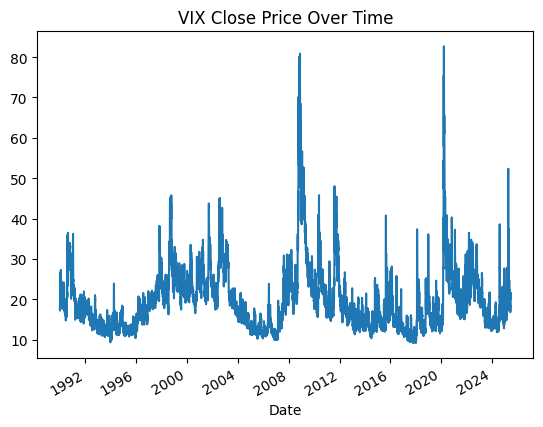

In [ ]:
# Plot
vix['c__'].plot(kind='line', title="VIX Close Price Over Time")



<Axes: title={'center': 'VIX Close Price Over Time'}, xlabel='Date'>

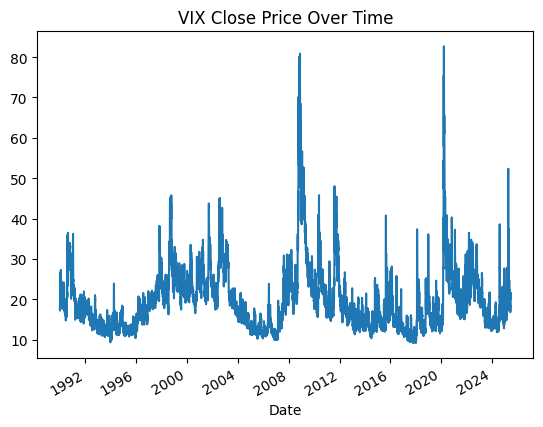

In [131]:
vix.rename(columns={
    'c__': 'close',
    'h__': 'high',
    'l__': 'low',
    'o__': 'open',
    'v__': 'volume'
}, inplace=True)

# Now much easier to read:
vix['close'].plot(kind='line', title="VIX Close Price Over Time")


In [132]:
# Dynamic visualisation of VIX prices
fig = px.line(vix,
              x=vix.index,
              y="close",
              title='VIX over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

## 3.2) Gold - other assets

In [133]:
# GOLD
# WEB: https://finance.yahoo.com/quote/GC%3DF
gold = yf.download(tickers = "GC=F",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [139]:
gold.tail(1)

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2025-06-20,3384.100098,3405.199951,3356.199951,3387.100098,276393


In [140]:
def get_growth_df(df, prefix, ticker_symbol=None, price_field='Close'):
    """
    Computes past growth features for a given price field in a MultiIndex or flat DataFrame.

    If ticker_symbol is not provided, it auto-detects it from the second level of the MultiIndex.

    Args:
        df: DataFrame with MultiIndex columns (e.g., from yfinance).
        prefix: Label prefix for output columns.
        ticker_symbol: Ticker (e.g., 'GLD'). Optional if only one ticker is present.
        price_field: 'Close' or 'Adj Close'.

    Returns:
        DataFrame with growth features added.
    """
    out = df.copy()

    # Auto-detect ticker if not provided
    if ticker_symbol is None:
        if isinstance(df.columns, pd.MultiIndex):
            tickers = df.columns.get_level_values(1).unique()
            if len(tickers) != 1:
                raise ValueError("Multiple tickers found. Please specify ticker_symbol.")
            ticker_symbol = tickers[0]
        else:
            raise ValueError("Flat DataFrame provided — please specify the price column directly.")

    try:
        price_series = df[(price_field, ticker_symbol)]
    except KeyError:
        raise KeyError(f"Column ({price_field}, {ticker_symbol}) not found in DataFrame. Available columns: {df.columns.tolist()}")

    for i in [1, 3, 7, 30, 90, 365]:
        out[f'growth_{prefix}_{i}d'] = price_series / price_series.shift(i)

    return out


In [141]:
gold_to_merge = get_growth_df(gold,'gold')
gold_to_merge.tail(2)

Price,Close,High,Low,Open,Volume,growth_gold_1d,growth_gold_3d,growth_gold_7d,growth_gold_30d,growth_gold_90d,growth_gold_365d
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,,,,,,
Date,,,,,,,,,,,
2025-06-18,3389.800049,3391.899902,3365.100098,3385.300049,1477,1.000945,0.987934,1.017316,0.993668,1.182227,1.659795
2025-06-20,3384.100098,3405.199951,3356.199951,3387.100098,276393,0.998318,0.996379,1.019031,1.000799,1.161205,1.656923


In [143]:
gold.columns = [f"{col[0].lower()}_{col[1].lower()}" for col in gold.columns]


In [146]:
print(gold.columns.tolist())


['close_gc=f', 'high_gc=f', 'low_gc=f', 'open_gc=f', 'volume_gc=f']


In [ ]:
gold.rename(columns={'close_gc=f': 'close'}, inplace=True)

# Then plotting becomes:# Dynamic visualisation of GOLD prices
fig = px.line(gold, x=gold.index, y='close', title='GOLD Close Price Over Time')
fig.update_layout(title_x=0.5) # This will center the title horizontally
fig.show()


## 3.3) WTI Crude and Brent Oil

In [151]:
# WTI Crude Oil
# WEB: https://uk.finance.yahoo.com/quote/CL=F/
crude_oil = yf.download(tickers = "CL=F",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [152]:
crude_oil.tail(2)

Price,Close,High,Low,Open,Volume
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F
Date,,,,,
2025-06-18,75.139999,76.070000,72.940002,75.610001,154264
2025-06-20,75.000000,77.580002,74.300003,74.599998,24890


In [153]:
crude_oil_to_merge = get_growth_df(crude_oil,'wti_oil')
crude_oil_to_merge.tail(2)

Price,Close,High,Low,Open,Volume,growth_wti_oil_1d,growth_wti_oil_3d,growth_wti_oil_7d,growth_wti_oil_30d,growth_wti_oil_90d,growth_wti_oil_365d
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F,,,,,,
Date,,,,,,,,,,,
2025-06-18,75.139999,76.070000,72.940002,75.610001,154264,1.004009,1.029597,1.150865,1.271620,1.058310,1.040864
2025-06-20,75.000000,77.580002,74.300003,74.599998,24890,0.998137,1.045005,1.154201,1.291545,1.037058,1.016123


In [157]:
# Flatten column names
crude_oil.columns = [f"{col[0].lower()}_{col[1].lower()}" for col in crude_oil.columns]

# Plot using the flattened name
fig = px.line(
    crude_oil,
    x=crude_oil.index,
    y='close_cl=f',
    title='WTI Crude Oil over time'
)
fig.update_layout(title_x=0.5)
fig.show()


In [158]:
# Brent Oil
# WEB: https://uk.finance.yahoo.com/quote/BZ=F/
brent_oil = yf.download(tickers = "BZ=F",
                     period = "max",
                     interval = "1d")

brent_oil.tail(2)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BZ=F,BZ=F,BZ=F,BZ=F,BZ=F
Date,,,,,
2025-06-18,76.699997,77.430000,74.440002,77.190002,88748
2025-06-20,77.220001,79.019997,75.529999,76.120003,97301


In [159]:
brent_oil_to_merge = get_growth_df(brent_oil,'brent_oil')
brent_oil_to_merge.tail(2)

Price,Close,High,Low,Open,Volume,growth_brent_oil_1d,growth_brent_oil_3d,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d
Ticker,BZ=F,BZ=F,BZ=F,BZ=F,BZ=F,,,,,,
Date,,,,,,,,,,,
2025-06-18,76.699997,77.430000,74.440002,77.190002,88748,1.00327,1.033275,1.144093,1.234111,1.027324,0.988529
2025-06-20,77.220001,79.019997,75.529999,76.120003,97301,1.00678,1.054486,1.154778,1.263416,1.017794,0.980447


In [164]:
brent_oil.columns = [f"{col[0].lower()}_{col[1].lower()}" for col in brent_oil.columns]


In [166]:
# Dynamic visualisation
fig = px.line(
    brent_oil,
    x=brent_oil.index,
    y='close_bz=f',
    title='Brent Oil over time'
)
fig.update_layout(title_x=0.5)
fig.show()


## 3.4) Bitcoin prices: BTC_USD

In [167]:
# https://finance.yahoo.com/quote/BTC-USD/
btc_usd =  yf.download(tickers = "BTC-USD",
                     period = "max",
                     interval = "1d")

btc_usd.tail(2)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-06-19,104684.289062,105250.890625,103940.773438,104886.773438,37333806920
2025-06-20,103713.093750,106461.671875,102480.875000,104677.554688,50589147136


In [168]:
btc_usd_to_merge = get_growth_df(btc_usd,'btc_usd')
btc_usd_to_merge.tail(2)

Price,Close,High,Low,Open,Volume,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,
Date,,,,,,,,,,,
2025-06-19,104684.289062,105250.890625,103940.773438,104886.773438,37333806920,0.998102,0.98022,0.988249,0.980272,1.245600,1.611512
2025-06-20,103713.093750,106461.671875,102480.875000,104677.554688,50589147136,0.990723,0.99151,0.977586,0.945614,1.237147,1.599803


In [171]:
btc_usd.columns = [f"{col[0].lower()}_{col[1].lower()}" for col in btc_usd.columns]


In [173]:
# Dynamic visualisation
fig = px.line(
    btc_usd,
    x=btc_usd.index,
    y='close_btc-usd',  # now accessible as a string
    title='Bitcoin price daily'
)
fig.update_layout(title_x=0.5)
fig.show()


## 3.5 [Code snippet 4] Eurostat: "The home of high-quality statistics and data on Europe"


In [174]:
!pip install eurostat

# https://pypi.org/project/eurostat/
# https://ec.europa.eu/eurostat/web/main/data/database

In [175]:
import eurostat

In [176]:
# LONG WAIT TIME ~15 min, unless you filter data

# https://ec.europa.eu/eurostat/cache/metadata/en/irt_euryld_esms.htm
  # Euro yield curves (irt_euryld)
  # Reference Metadata in Euro SDMX Metadata Structure (ESMS)
  # Compiling agency: Eurostat, the statistical office of the European Uni

# the service is slow, you need to specify addtional params : https://pypi.org/project/eurostat/0.2.3/

filter_pars = {'startPeriod':'2024-04-01', 'endPeriod':'2024-05-01'}

code = 'irt_euryld_d'
eurostat_euro_yield_df = eurostat.get_data_df(code, flags=True, filter_pars=filter_pars,  verbose=True)

Download progress: 100.0%



In [177]:
eurostat_euro_yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   freq              2148 non-null   object 
 1   yld_curv          2148 non-null   object 
 2   maturity          2148 non-null   object 
 3   bonds             2148 non-null   object 
 4   geo\TIME_PERIOD   2148 non-null   object 
 5   2024-04-02_value  2148 non-null   float64
 6   2024-04-02_flag   2148 non-null   object 
 7   2024-04-03_value  2148 non-null   float64
 8   2024-04-03_flag   2148 non-null   object 
 9   2024-04-04_value  2148 non-null   float64
 10  2024-04-04_flag   2148 non-null   object 
 11  2024-04-05_value  2148 non-null   float64
 12  2024-04-05_flag   2148 non-null   object 
 13  2024-04-08_value  2148 non-null   float64
 14  2024-04-08_flag   2148 non-null   object 
 15  2024-04-09_value  2148 non-null   float64
 16  2024-04-09_flag   2148 non-null   object 


In [178]:
eurostat_euro_yield_df.head()

,freq,yld_curv,maturity,bonds,geo\TIME_PERIOD,2024-04-02_value,2024-04-02_flag,2024-04-03_value,2024-04-03_flag,2024-04-04_value,...,2024-04-23_value,2024-04-23_flag,2024-04-24_value,2024-04-24_flag,2024-04-25_value,2024-04-25_flag,2024-04-26_value,2024-04-26_flag,2024-04-29_value,2024-04-29_flag
0,D,INS_FWD,M10,CGB_EA,EA,2.93540,,2.97183,,2.92502,...,3.02264,,3.08430,,3.13182,,3.08867,,3.06128,
1,D,INS_FWD,M10,CGB_EA_AAA,EA,2.84475,,2.86360,,2.83422,...,2.91176,,2.96612,,3.01979,,2.98661,,2.95786,
2,D,INS_FWD,M11,CGB_EA,EA,2.87170,,2.90848,,2.85814,...,2.96704,,3.03342,,3.08275,,3.03647,,3.00758,
3,D,INS_FWD,M11,CGB_EA_AAA,EA,2.76744,,2.78547,,2.75286,...,2.84353,,2.90169,,2.95777,,2.92274,,2.89261,
4,D,INS_FWD,M3,CGB_EA,EA,3.61646,,3.63975,,3.62033,...,3.59855,,3.61313,,3.64745,,3.63097,,3.61332,


In [179]:
eurostat_euro_yield_df['bonds'].value_counts()

bonds
CGB_EA        1074
CGB_EA_AAA    1074
Name: count, dtype: int64

In [180]:
eurostat_euro_yield_df['maturity'].value_counts()


maturity
Y9_M9    6
M10      6
M11      6
M3       6
M4       6
        ..
Y10      6
Y1       6
M9       6
M8       6
M7       6
Name: count, Length: 358, dtype: int64

In [181]:
eurostat_euro_yield_df['yld_curv'].value_counts()

yld_curv
INS_FWD    716
PAR        716
SPOT_RT    716
Name: count, dtype: int64

In [182]:
eurostat_euro_yield_df

,freq,yld_curv,maturity,bonds,geo\TIME_PERIOD,2024-04-02_value,2024-04-02_flag,2024-04-03_value,2024-04-03_flag,2024-04-04_value,...,2024-04-23_value,2024-04-23_flag,2024-04-24_value,2024-04-24_flag,2024-04-25_value,2024-04-25_flag,2024-04-26_value,2024-04-26_flag,2024-04-29_value,2024-04-29_flag
0,D,INS_FWD,M10,CGB_EA,EA,2.93540,,2.97183,,2.92502,...,3.02264,,3.08430,,3.13182,,3.08867,,3.06128,
1,D,INS_FWD,M10,CGB_EA_AAA,EA,2.84475,,2.86360,,2.83422,...,2.91176,,2.96612,,3.01979,,2.98661,,2.95786,
2,D,INS_FWD,M11,CGB_EA,EA,2.87170,,2.90848,,2.85814,...,2.96704,,3.03342,,3.08275,,3.03647,,3.00758,
3,D,INS_FWD,M11,CGB_EA_AAA,EA,2.76744,,2.78547,,2.75286,...,2.84353,,2.90169,,2.95777,,2.92274,,2.89261,
4,D,INS_FWD,M3,CGB_EA,EA,3.61646,,3.63975,,3.62033,...,3.59855,,3.61313,,3.64745,,3.63097,,3.61332,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,D,SPOT_RT,Y9_M7,CGB_EA_AAA,EA,2.46991,,2.46791,,2.39559,...,2.54635,,2.62834,,2.68168,,2.60908,,2.57881,
2144,D,SPOT_RT,Y9_M8,CGB_EA,EA,3.05403,,3.06662,,2.97186,...,3.07345,,3.16620,,3.23291,,3.14712,,3.10632,
2145,D,SPOT_RT,Y9_M8,CGB_EA_AAA,EA,2.47321,,2.47116,,2.39873,...,2.54935,,2.63147,,2.68473,,2.61196,,2.58177,
2146,D,SPOT_RT,Y9_M9,CGB_EA,EA,3.05847,,3.07104,,2.97618,...,3.07734,,3.17017,,3.23687,,3.15093,,3.11021,


In [183]:
# Visual graph: https://www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html
FILTER = (eurostat_euro_yield_df.yld_curv=='SPOT_RT')& (eurostat_euro_yield_df.bonds=='CGB_EA_AAA')
filtered_eurostat_euro_yield_df = eurostat_euro_yield_df[FILTER]

In [184]:
filtered_eurostat_euro_yield_df.sort_values(by='maturity')[['maturity','2024-04-18_value']].head(20)

,maturity,2024-04-18_value
1433,M10,3.36335
1435,M11,3.31940
1437,M3,3.72264
1439,M4,3.66536
1441,M5,3.61017
1443,M6,3.55700
1445,M7,3.50580
1447,M8,3.45649
1449,M9,3.40903
1451,Y1,3.27711


In [185]:
import re

def extract_numbers(input_string):
    y_match = re.search(r'Y(\d+)', input_string)
    m_match = re.search(r'M(\d+)', input_string)

    y_number = int(y_match.group(1)) if y_match else 0
    m_number = int(m_match.group(1)) if m_match else 0


    return y_number*12 + m_number

# Examples
examples = ["Y10_M2", "M3", "Y1"]
for example in examples:
    res = extract_numbers(example)
    print(f"{example} ==> {res}")

Y10_M2 ==> 122
M3 ==> 3
Y1 ==> 12


In [186]:
# define new field: "maturity in months"
filtered_eurostat_euro_yield_df['maturity_in_months'] = filtered_eurostat_euro_yield_df.maturity.apply(lambda x:extract_numbers(x))

C:\Users\rahul\AppData\Local\Temp\ipykernel_34532\2384786281.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [187]:
filtered_eurostat_euro_yield_df.sort_values(by='maturity_in_months')[['maturity','maturity_in_months','2024-04-18_value']].head(20)

,maturity,maturity_in_months,2024-04-18_value
1437,M3,3,3.72264
1439,M4,4,3.66536
1441,M5,5,3.61017
1443,M6,6,3.55700
1445,M7,7,3.50580
1447,M8,8,3.45649
1449,M9,9,3.40903
1433,M10,10,3.36335
1435,M11,11,3.31940
1451,Y1,12,3.27711


In [188]:
filtered_eurostat_euro_yield_df.loc[:,'maturity_in_years'] = filtered_eurostat_euro_yield_df.maturity_in_months/12.0

C:\Users\rahul\AppData\Local\Temp\ipykernel_34532\2163179308.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: title={'center': 'AAA rated bonds spot yield curve'}, xlabel='maturity_in_years'>

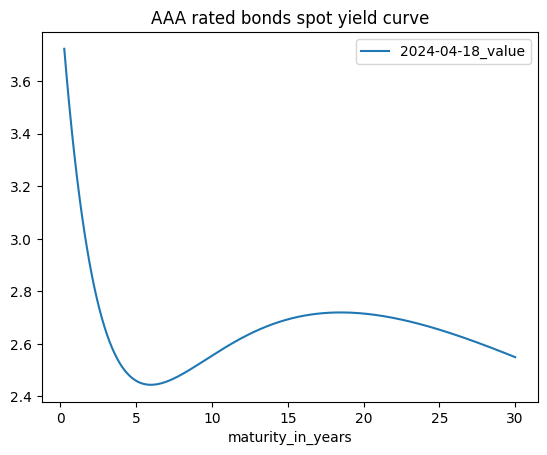

In [189]:
# exactly the same as on the Web:  https://www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html
filtered_eurostat_euro_yield_df \
  .sort_values(by='maturity_in_months')[['maturity_in_years','2024-04-18_value']] \
  .plot.line(x='maturity_in_years',
            y='2024-04-18_value',
            title='AAA rated bonds spot yield curve')

# 4) [Code Snippet 5] Fundamental indicators

* Read about "Ratio Analysis" to learn about more ratios: https://www.investopedia.com/terms/r/ratioanalysis.asp
* https://algotrading101.com/learn/yahoo-finance-api-guide/

In [190]:
# let's select some set of stocks: e.g. top US companies on 'Employees':
# https://companiesmarketcap.com/usa/largest-american-companies-by-number-of-employees/

US_TOP_EMPLOYEES_STOCKS = ['WMT','AMZN','UPS','HD','CNXC','TGT','KR','UNH','BRK-B','SBUX']

# WMT
ticker = US_TOP_EMPLOYEES_STOCKS[0]

# WMT ticker
one_company = yf.Ticker(ticker)

In [191]:
# Fundamental info appears close earning dates, you need to download it and use quickly (before/after trading day),
#  unless you're a fundamental long-term investor looking for a several months-quarters-years strategy (period between buy and sell)
# This dfthis is the easiest thing to join with the main dataset and get "some" technical indicators present
eps_earnings = one_company.earnings_dates
eps_earnings['Ticker'] = ticker
eps_earnings

,EPS Estimate,Reported EPS,Surprise(%),Ticker
Earnings Date,,,,
2026-05-13 09:30:00-04:00,NaN,NaN,NaN,WMT
2026-02-19 09:30:00-05:00,NaN,NaN,NaN,WMT
2025-11-20 09:30:00-05:00,NaN,NaN,NaN,WMT
2025-08-21 09:30:00-04:00,NaN,NaN,NaN,WMT
2025-05-15 07:01:00-04:00,0.58,0.61,5.93,WMT
2025-02-20 06:59:00-05:00,0.64,0.66,2.57,WMT
2024-11-19 07:00:00-05:00,0.53,0.58,8.82,WMT
2024-08-15 07:02:00-04:00,0.65,0.67,3.78,WMT
2024-05-16 07:01:00-04:00,0.52,0.60,14.60,WMT


In [192]:
one_company.calendar

{'Dividend Date': datetime.date(2026, 1, 4),
 'Ex-Dividend Date': datetime.date(2025, 8, 14),
 'Earnings Date': [datetime.date(2025, 8, 21)],
 'Earnings High': 0.9,
 'Earnings Low': 0.67,
 'Earnings Average': 0.73007,
 'Revenue High': 176653000000,
 'Revenue Low': 172272000000,
 'Revenue Average': 174085276030}

In [194]:
one_company.financials

,2025-01-31,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,-612140000.0,NaN
Tax Rate For Calcs,0.234,0.255,0.336,0.254,NaN
Normalized EBITDA,42010000000.0,36384000000.0,30089000000.0,33758000000.0,NaN
Total Unusual Items,NaN,0.0,0.0,-2410000000.0,0.0
Total Unusual Items Excluding Goodwill,NaN,0.0,0.0,-2410000000.0,0.0
Net Income From Continuing Operation Net Minority Interest,19436000000.0,15511000000.0,11680000000.0,13673000000.0,NaN
Reconciled Depreciation,12973000000.0,11853000000.0,10945000000.0,10658000000.0,NaN
Reconciled Cost Of Revenue,511753000000.0,490142000000.0,463721000000.0,429000000000.0,NaN
EBITDA,42010000000.0,36384000000.0,30089000000.0,31348000000.0,NaN
EBIT,29037000000.0,24531000000.0,19144000000.0,20690000000.0,NaN


In [195]:
EPS = one_company.financials.loc['Basic EPS']
EPS

2025-01-31        2.42
2024-01-31        1.92
2023-01-31        1.43
2022-01-31    1.633333
2021-01-31         NaN
Name: Basic EPS, dtype: object

In [196]:
# or should we use NORMALIZED_EBITDA?
EBITDA = one_company.financials.loc['EBITDA']
EBITDA_margin = one_company.financials.loc['EBITDA'] /  one_company.financials.loc['Total Revenue']

In [197]:
EBITDA_margin

2025-01-31     0.06169
2024-01-31    0.056137
2023-01-31    0.049222
2022-01-31    0.054732
2021-01-31         NaN
dtype: object

In [198]:
NET_INCOME = one_company.financials.loc['Net Income']
NET_INCOME_margin = one_company.financials.loc['Net Income'] /  one_company.financials.loc['Total Revenue']

In [199]:
NET_INCOME

2025-01-31    19436000000.0
2024-01-31    15511000000.0
2023-01-31    11680000000.0
2022-01-31    13673000000.0
2021-01-31              NaN
Name: Net Income, dtype: object

In [200]:
# Compare with Public information - you can fully replicate the numbers (yearly and/or quarterly):
# https://www.wsj.com/market-data/quotes/WMT/financials/annual/income-statement
NET_INCOME_margin

2025-01-31    0.028541
2024-01-31    0.023932
2023-01-31    0.019107
2022-01-31    0.023872
2021-01-31         NaN
dtype: object

In [201]:
# Combine the series into a DataFrame
df_fin_ratios = pd.DataFrame({
    'NET_INCOME_margin': 100.0 * NET_INCOME_margin, #for visualisation -- Margin in %
    'EBITDA_margin': 100.0 *EBITDA_margin, #for visualisation -- Margin in %
    'EPS': EPS
})

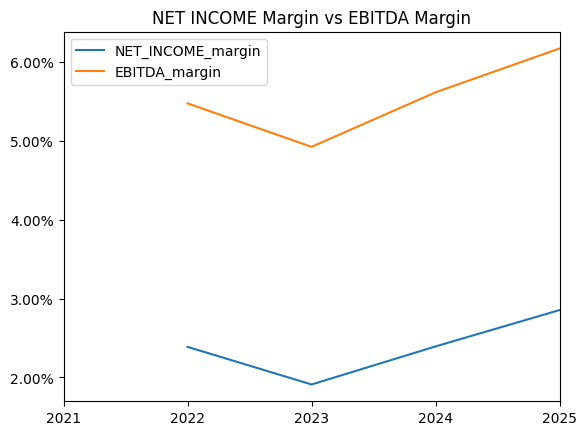

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming df_fin_ratios is your DataFrame containing the financial ratios
# Make sure you have already created this DataFrame

# Plotting the specified columns
ax = df_fin_ratios[['NET_INCOME_margin','EBITDA_margin']].plot.line()

# Setting the y-axis formatter to display values as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Adding title
plt.title('NET INCOME Margin vs EBITDA Margin')

# Displaying the plot
plt.show()

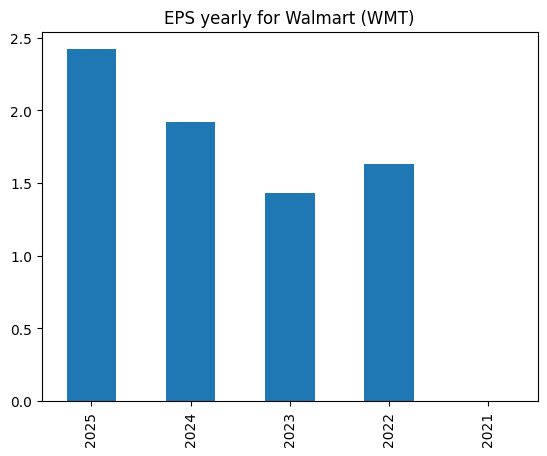

In [203]:
EPS_year = df_fin_ratios['EPS'].index.year

df_fin_ratios['EPS'].plot.bar(title = 'EPS yearly for Walmart (WMT)')

plt.xticks(range(len(EPS_year)), EPS_year)
# Displaying the plot
plt.show()

# 5) [Code snippet 7] Daily OHCLV data for a set of stocks

In [204]:
# https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']

# You're required to add EU_STOCKS and INDIA_STOCS
# https://companiesmarketcap.com/european-union/largest-companies-in-the-eu-by-market-cap/
EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']

# https://companiesmarketcap.com/india/largest-companies-in-india-by-market-cap/
INDIA_STOCKS = ['RELIANCE.NS','TCS.NS','HDB','BHARTIARTL.NS','IBN','SBIN.NS','LICI.NS','INFY','ITC.NS','HINDUNILVR.NS','LT.NS']

In [205]:
ALL_TICKERS = US_STOCKS  + EU_STOCKS + INDIA_STOCKS
ALL_TICKERS

['MSFT',
 'AAPL',
 'GOOG',
 'NVDA',
 'AMZN',
 'META',
 'BRK-B',
 'LLY',
 'AVGO',
 'V',
 'JPM',
 'NVO',
 'MC.PA',
 'ASML',
 'RMS.PA',
 'OR.PA',
 'SAP',
 'ACN',
 'TTE',
 'SIE.DE',
 'IDEXY',
 'CDI.PA',
 'RELIANCE.NS',
 'TCS.NS',
 'HDB',
 'BHARTIARTL.NS',
 'IBN',
 'SBIN.NS',
 'LICI.NS',
 'INFY',
 'ITC.NS',
 'HINDUNILVR.NS',
 'LT.NS']

In [207]:
import time
import yfinance as yf
import pandas as pd
import numpy as np

stocks_df = pd.DataFrame()

for i, ticker in enumerate(ALL_TICKERS):
    print(i, ticker)

    historyPrices = yf.download(
        tickers=ticker,
        period="max",
        interval="1d",
        progress=False
    )

    if historyPrices.empty or 'Adj Close' not in historyPrices.columns:
        print(f"Skipping {ticker} — no data or no 'Adj Close'")
        continue

    # Add metadata
    historyPrices['Ticker'] = ticker
    historyPrices['Year'] = historyPrices.index.year
    historyPrices['Month'] = historyPrices.index.month
    historyPrices['Weekday'] = historyPrices.index.weekday
    historyPrices['Date'] = historyPrices.index.date

    # Historical returns
    for days in [1, 3, 7, 30, 90, 365]:
        historyPrices[f'growth_{days}d'] = (
            historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(days)
        )

    historyPrices['growth_future_5d'] = (
        historyPrices['Adj Close'].shift(-5) / historyPrices['Adj Close']
    )

    # Technical indicators
    historyPrices['SMA10'] = historyPrices['Close'].rolling(10).mean()
    historyPrices['SMA20'] = historyPrices['Close'].rolling(20).mean()
    historyPrices['growing_moving_average'] = (
        historyPrices['SMA10'] > historyPrices['SMA20']
    ).astype(int)

    historyPrices['high_minus_low_relative'] = (
        (historyPrices['High'] - historyPrices['Low']) / historyPrices['Adj Close']
    )

    historyPrices['volatility'] = (
        historyPrices['Adj Close'].rolling(30).std() * np.sqrt(252)
    )

    # Target variable
    historyPrices['is_positive_growth_5d_future'] = (
        historyPrices['growth_future_5d'] > 1
    ).astype(int)

    # Sleep to avoid API limits
    time.sleep(1)

    # Append to master DataFrame
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)


0 MSFT
Skipping MSFT — no data or no 'Adj Close'
1 AAPL
Skipping AAPL — no data or no 'Adj Close'
2 GOOG
Skipping GOOG — no data or no 'Adj Close'
3 NVDA
Skipping NVDA — no data or no 'Adj Close'
4 AMZN
Skipping AMZN — no data or no 'Adj Close'
5 META
Skipping META — no data or no 'Adj Close'
6 BRK-B
Skipping BRK-B — no data or no 'Adj Close'
7 LLY
Skipping LLY — no data or no 'Adj Close'
8 AVGO
Skipping AVGO — no data or no 'Adj Close'
9 V
Skipping V — no data or no 'Adj Close'
10 JPM
Skipping JPM — no data or no 'Adj Close'
11 NVO
Skipping NVO — no data or no 'Adj Close'
12 MC.PA
Skipping MC.PA — no data or no 'Adj Close'
13 ASML
Skipping ASML — no data or no 'Adj Close'
14 RMS.PA
Skipping RMS.PA — no data or no 'Adj Close'
15 OR.PA
Skipping OR.PA — no data or no 'Adj Close'
16 SAP
Skipping SAP — no data or no 'Adj Close'
17 ACN
Skipping ACN — no data or no 'Adj Close'
18 TTE
Skipping TTE — no data or no 'Adj Close'
19 SIE.DE
Skipping SIE.DE — no data or no 'Adj Close'
20 IDEXY
Skipp

In [208]:
def get_ticker_type(ticker:str, us_stocks_list, eu_stocks_list, india_stocks_list):
  if ticker in us_stocks_list:
    return 'US'
  elif ticker in eu_stocks_list:
    return 'EU'
  elif ticker in india_stocks_list:
    return 'INDIA'
  else:
    return 'ERROR'


In [210]:
print(stocks_df.columns)


RangeIndex(start=0, stop=0, step=1)


In [211]:
print(stocks_df.empty)  # Should return True


True


In [212]:
print(stocks_df.head())  # Will return nothing if empty


Empty DataFrame
Columns: []
Index: []


In [213]:
stocks_df = pd.DataFrame()

for ticker in ALL_TICKERS:
    data = yf.download(ticker, period="1mo")
    if not data.empty:
        data['ticker'] = ticker
        stocks_df = pd.concat([stocks_df, data])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [214]:
print(stocks_df.columns)


MultiIndex([( 'Close',          'MSFT'),
            (  'High',          'MSFT'),
            (   'Low',          'MSFT'),
            (  'Open',          'MSFT'),
            ('Volume',          'MSFT'),
            ('ticker',              ''),
            ( 'Close',          'AAPL'),
            (  'High',          'AAPL'),
            (   'Low',          'AAPL'),
            (  'Open',          'AAPL'),
            ...
            ( 'Close', 'HINDUNILVR.NS'),
            (  'High', 'HINDUNILVR.NS'),
            (   'Low', 'HINDUNILVR.NS'),
            (  'Open', 'HINDUNILVR.NS'),
            ('Volume', 'HINDUNILVR.NS'),
            ( 'Close',         'LT.NS'),
            (  'High',         'LT.NS'),
            (   'Low',         'LT.NS'),
            (  'Open',         'LT.NS'),
            ('Volume',         'LT.NS')],
           names=['Price', 'Ticker'], length=166)


In [220]:
# 1. Extract the ticker symbols from the MultiIndex (2nd level)
tickers = sorted(set([col[1] for col in stocks_df.columns if col[1] != '']))

# 2. Apply your custom function on each ticker
ticker_types = pd.DataFrame({
    'ticker': tickers,
    'ticker_type': [get_ticker_type(t, US_STOCKS, EU_STOCKS, INDIA_STOCKS) for t in tickers]
})

# 3. (Optional) View the result
print(ticker_types.head())


  ticker ticker_type
0   AAPL          US
1    ACN          EU
2   AMZN          US
3   ASML          EU
4   AVGO          US


In [225]:
# Example: merging with per-ticker summary stats
summary_df = pd.DataFrame({
    'ticker': ['AAPL', 'AMZN', 'AVGO'],
    'mean_close': [150, 120, 700]
})

merged = summary_df.merge(ticker_types_df, on='ticker', how='left')


In [226]:
# Example: average close by region
stocks_summary = []

for ticker in ticker_types_df['ticker']:
    df_one = stocks_df.xs(key=ticker, level=1, axis=1).copy()
    df_one['ticker'] = ticker
    df_one['ticker_type'] = get_ticker_type(ticker, US_STOCKS, EU_STOCKS, INDIA_STOCKS)
    stocks_summary.append(df_one)

all_data = pd.concat(stocks_summary)
grouped = all_data.groupby('ticker_type')['Close'].mean()
print(grouped)


ticker_type
EU        508.224187
INDIA    1408.359503
US        363.077439
Name: Close, dtype: float64


In [227]:
# Extract tickers from MultiIndex
tickers = sorted(set([col[1] for col in stocks_df.columns if col[1] != '']))

# Create a new DataFrame with one row per ticker and its type
ticker_types = pd.DataFrame({
    'ticker': tickers,
    'ticker_type': [get_ticker_type(t, US_STOCKS, EU_STOCKS, INDIA_STOCKS) for t in tickers]
})


In [ ]:
# flat column structure like 'Close_AAPL', 'Open_MSFT'
stocks_df.columns = [f"{col[0]}_{col[1]}" for col in stocks_df.columns]


In [ ]:
# count of observations between US-EU-INDIA stocks
stocks_df.ticker_type.value_counts()

ticker_type
US       80639
EU       76986
INDIA    63265
Name: count, dtype: int64

In [234]:
unique_tickers = sorted(set(col[1] for col in stocks_df.columns if col[1] != ''))
print(f"Number of unique tickers: {len(unique_tickers)}")


Number of unique tickers: 4


In [241]:
print(stocks_df.columns[:5])
print(type(stocks_df.columns[0]))


Index(['Close_MSFT', 'High_MSFT', 'Low_MSFT', 'Open_MSFT', 'Volume_MSFT'], dtype='object')
<class 'str'>


In [242]:
# Detect if column names are tuples (MultiIndex) or flat strings
if isinstance(stocks_df.columns[0], tuple):
    # True MultiIndex: extract tickers from level 1
    tickers = list(set(col[1] for col in stocks_df.columns if col[1] != ''))
else:
    # Flattened columns like 'Close_AAPL' or "('Close', 'AAPL')"
    # Try to extract ticker from string (e.g., "Close_AAPL" or "('Close', 'AAPL')")
    import re
    tickers = list(set([
        re.findall(r"'?([\w\.\-]+)'?\)?$", str(col))[0]
        for col in stocks_df.columns
        if isinstance(col, str) and re.search(r"[A-Z]{2,}|\.NS", str(col))
    ]))

# Count non-NaN rows per ticker
ticker_counts = {
    ticker: stocks_df[[col for col in stocks_df.columns if ticker in str(col)]].dropna().shape[0]
    for ticker in tickers
}

# Convert to Series for display
import pandas as pd
ticker_counts_series = pd.Series(ticker_counts).sort_values(ascending=False)
print(ticker_counts_series)


High_SBIN.NS         24
High_SIE.DE          24
Open_SBIN.NS         24
Close_RELIANCE.NS    24
Volume_LICI.NS       24
                     ..
High_IDEXY           21
Close_HDB            21
Open_AVGO            21
Close_IBN            21
Low_IBN              21
Length: 160, dtype: int64


In [247]:
stocks_df.groupby(['Ticker','ticker_type']).Date.agg(['min','max'])

KeyError: 'Ticker'

In [249]:
stocks_df.columns[:5]
# [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]


Index(['Close_MSFT', 'High_MSFT', 'Low_MSFT', 'Open_MSFT', 'Volume_MSFT'], dtype='object')

In [250]:
stocks_df = stocks_df.reset_index()


In [253]:
# Attempt to parse string columns into real tuples
def parse_tuple(col):
    if isinstance(col, str) and col.startswith("(") and "," in col:
        try:
            return eval(col)  # turns "('Close', 'AAPL')" → ('Close', 'AAPL')
        except:
            return (col, '')  # fallback
    elif isinstance(col, tuple):
        return col
    else:
        return (col, '')  # fallback for simple strings

# Apply to all columns
parsed_cols = [parse_tuple(col) for col in stocks_df.columns]

# Assign proper MultiIndex
stocks_df.columns = pd.MultiIndex.from_tuples(parsed_cols, names=["Price", "Ticker"])


In [255]:
print(stocks_df.index.names)         # Check if 'Date' is still the index
print(stocks_df.columns[:5])        # Check columns after reset_index()


[None]
MultiIndex([(     'index', ''),
            (      'Date', ''),
            ('Close_MSFT', ''),
            ( 'High_MSFT', ''),
            (  'Low_MSFT', '')],
           names=['Price', 'Ticker'])


In [256]:
# Flatten MultiIndex columns to simple string names like 'Close_MSFT'
stocks_df.columns = [f"{c[0]}_{c[1]}" if c[1] else c[0] for c in stocks_df.columns]


In [257]:
# Drop 'index' if present (artifact from reset_index)
if 'index' in stocks_df.columns:
    stocks_df = stocks_df.drop(columns='index')

# Melt long
long_df = pd.melt(
    stocks_df,
    id_vars='Date',
    var_name='Combined',
    value_name='Value'
)


In [258]:
# Split combined column like 'Close_MSFT' into two columns
long_df[['Price', 'Ticker']] = long_df['Combined'].str.extract(r'(\w+)_([\w\.\-]+)')
long_df = long_df.drop(columns='Combined')


In [260]:
pivot_df = long_df.pivot_table(
    index=['Date', 'Ticker'],
    columns='Price',
    values='Value',
    aggfunc='first'  # or 'mean', 'max', etc. depending on your use case
).reset_index()


In [261]:
dupes = long_df.duplicated(subset=['Date', 'Ticker', 'Price'], keep=False)
print(long_df[dupes].sort_values(['Date', 'Ticker', 'Price']))


           Date          Value  Price Ticker
4644 2025-05-20            NaN  Close   AAPL
4689 2025-05-20            NaN  Close   AAPL
4713 2025-05-20            NaN  Close   AAPL
4800 2025-05-20            NaN  Close   AAPL
4845 2025-05-20            NaN  Close   AAPL
...         ...            ...    ...    ...
4298 2025-06-20        LICI.NS    NaN    NaN
4319 2025-06-20           INFY    NaN    NaN
4343 2025-06-20         ITC.NS    NaN    NaN
4367 2025-06-20  HINDUNILVR.NS    NaN    NaN
4391 2025-06-20          LT.NS    NaN    NaN

[121512 rows x 4 columns]


In [263]:
print(pivot_df.columns)


Index(['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [266]:
# Remove the column index name if it exists
pivot_df.columns.name = None


In [267]:
print(pivot_df.columns)
# Should show: Index(['Date', 'Ticker', 'Close', 'High', ...], dtype='object')


Index(['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [269]:
print(pivot_df.columns.tolist())


['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume']


In [270]:

print(pivot_df.columns.tolist())



['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume']


In [271]:
print(pivot_df.index.names)


[None]


In [272]:
pivot_df = pivot_df.reset_index(drop=False)


In [273]:
print("Ticker" in pivot_df.columns)
print("Ticker" in ticker_types_df.columns)


True
False


In [275]:
print(ticker_types_df.columns.tolist())


['ticker', 'ticker_type']


In [276]:
ticker_types_df = ticker_types_df.rename(columns={'ticker': 'Ticker'})


In [279]:
print(pivot_df.columns.tolist())


['index', 'Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume']


In [280]:
print(ticker_types_df.columns.tolist())


['Ticker', 'ticker_type']


In [281]:
# Perform the merge correctly
pivot_df = pivot_df.merge(ticker_types_df, on='Ticker', how='left')

# Confirm ticker_type is now in the columns
print(pivot_df.columns.tolist())  # should include 'ticker_type'

# Group by ticker and type to get min/max date range
date_ranges = pivot_df.groupby(['Ticker', 'ticker_type'])['Date'].agg(['min', 'max']).reset_index()

print(date_ranges)


['index', 'Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume', 'ticker_type']
           Ticker ticker_type        min        max
0            AAPL          US 2025-05-21 2025-06-20
1             ACN          EU 2025-05-21 2025-06-20
2            AMZN          US 2025-05-21 2025-06-20
3            ASML          EU 2025-05-21 2025-06-20
4            AVGO          US 2025-05-21 2025-06-20
5   BHARTIARTL.NS       INDIA 2025-05-20 2025-06-20
6           BRK-B          US 2025-05-21 2025-06-20
7          CDI.PA          EU 2025-05-20 2025-06-20
8            GOOG          US 2025-05-21 2025-06-20
9             HDB       INDIA 2025-05-21 2025-06-20
10  HINDUNILVR.NS       INDIA 2025-05-20 2025-06-20
11            IBN       INDIA 2025-05-21 2025-06-20
12          IDEXY          EU 2025-05-21 2025-06-20
13           INFY       INDIA 2025-05-21 2025-06-20
14         ITC.NS       INDIA 2025-05-20 2025-06-20
15            JPM          US 2025-05-21 2025-06-20
16        LICI.NS       INDIA 2

In [282]:
date_ranges = pivot_df.groupby(['Ticker', 'ticker_type'])['Date'].agg(['min', 'max']).reset_index()
print(date_ranges)


           Ticker ticker_type        min        max
0            AAPL          US 2025-05-21 2025-06-20
1             ACN          EU 2025-05-21 2025-06-20
2            AMZN          US 2025-05-21 2025-06-20
3            ASML          EU 2025-05-21 2025-06-20
4            AVGO          US 2025-05-21 2025-06-20
5   BHARTIARTL.NS       INDIA 2025-05-20 2025-06-20
6           BRK-B          US 2025-05-21 2025-06-20
7          CDI.PA          EU 2025-05-20 2025-06-20
8            GOOG          US 2025-05-21 2025-06-20
9             HDB       INDIA 2025-05-21 2025-06-20
10  HINDUNILVR.NS       INDIA 2025-05-20 2025-06-20
11            IBN       INDIA 2025-05-21 2025-06-20
12          IDEXY          EU 2025-05-21 2025-06-20
13           INFY       INDIA 2025-05-21 2025-06-20
14         ITC.NS       INDIA 2025-05-20 2025-06-20
15            JPM          US 2025-05-21 2025-06-20
16        LICI.NS       INDIA 2025-05-20 2025-06-20
17            LLY          US 2025-05-21 2025-06-20
18          

In [289]:
pivot_df['Year'] = pd.to_datetime(pivot_df['Date']).dt.year


In [290]:
pivot_df = pivot_df.sort_values(['Ticker', 'Date'])
pivot_df['growth_365d'] = pivot_df.groupby('Ticker')['Close'].transform(lambda x: x / x.shift(365))


In [292]:
print(pivot_df.columns.tolist())


['index', 'Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume', 'ticker_type_x', 'ticker_type_y', 'Year', 'growth_365d']


In [293]:
pivot_df = pivot_df.merge(ticker_types_df, on='Ticker', how='left')


In [294]:
pivot_df['Date'] = pd.to_datetime(pivot_df['Date'], errors='coerce')
pivot_df['Year'] = pivot_df['Date'].dt.year


In [295]:
pivot_df = pivot_df.sort_values(['Ticker', 'Date'])
pivot_df['growth_365d'] = pivot_df.groupby('Ticker')['Close'].transform(lambda x: x / x.shift(365))


In [296]:
avg_growth = (
    pivot_df[pivot_df['Year'] >= 2020]
    .groupby(['Year', 'ticker_type'])['growth_365d']
    .mean()
    .reset_index()
)

print(avg_growth)


   Year ticker_type growth_365d
0  2025          EU         NaN
1  2025       INDIA         NaN
2  2025          US         NaN


In [308]:
import pandas as pd

# Ensure Date is datetime and no nulls
pivot_df['Date'] = pd.to_datetime(pivot_df['Date'], errors='coerce')
pivot_df = pivot_df.dropna(subset=['Date', 'Ticker', 'Close'])

# Create the shifted 365-day forward DataFrame
prev_df = pivot_df[['Ticker', 'Date', 'Close']].copy()
prev_df['Date'] = prev_df['Date'] + pd.Timedelta(days=365)
prev_df = prev_df.rename(columns={'Close': 'Close_365d_ago'})

# ✅ The critical change: sort by 'Date' first, then 'Ticker'
pivot_df = pivot_df.sort_values(['Date', 'Ticker']).reset_index(drop=True)
prev_df = prev_df.sort_values(['Date', 'Ticker']).reset_index(drop=True)

# Confirm the merge_asof sort requirement is satisfied
print("pivot_df sorted correctly for merge_asof:", pivot_df[['Date', 'Ticker']].equals(pivot_df[['Date', 'Ticker']].sort_values(['Date', 'Ticker'])))
print("prev_df sorted correctly for merge_asof:", prev_df[['Date', 'Ticker']].equals(prev_df[['Date', 'Ticker']].sort_values(['Date', 'Ticker'])))

# Perform the merge
pivot_df = pd.merge_asof(
    left=pivot_df,
    right=prev_df,
    on='Date',
    by='Ticker',
    direction='backward',
    allow_exact_matches=False
)

# Compute growth
pivot_df['growth_365d'] = pivot_df['Close'] / pivot_df['Close_365d_ago']


pivot_df sorted correctly for merge_asof: True
prev_df sorted correctly for merge_asof: True


In [309]:
avg_growth = pivot_df[pivot_df['Year'] >= 2020].groupby(['Year', 'ticker_type'])['growth_365d'].mean().reset_index()

print(avg_growth)


   Year ticker_type growth_365d
0  2025          EU         NaN
1  2025       INDIA         NaN
2  2025          US         NaN


In [310]:
print(pivot_df[['Ticker', 'Date']].groupby('Ticker').agg(['min', 'max']))


                    Date           
                     min        max
Ticker                             
AAPL          2025-05-21 2025-06-20
ACN           2025-05-21 2025-06-20
AMZN          2025-05-21 2025-06-20
ASML          2025-05-21 2025-06-20
AVGO          2025-05-21 2025-06-20
BHARTIARTL.NS 2025-05-20 2025-06-20
BRK-B         2025-05-21 2025-06-20
CDI.PA        2025-05-20 2025-06-20
GOOG          2025-05-21 2025-06-20
HDB           2025-05-21 2025-06-20
HINDUNILVR.NS 2025-05-20 2025-06-20
IBN           2025-05-21 2025-06-20
IDEXY         2025-05-21 2025-06-20
INFY          2025-05-21 2025-06-20
ITC.NS        2025-05-20 2025-06-20
JPM           2025-05-21 2025-06-20
LICI.NS       2025-05-20 2025-06-20
LLY           2025-05-21 2025-06-20
LT.NS         2025-05-20 2025-06-20
MC.PA         2025-05-20 2025-06-20
META          2025-05-21 2025-06-20
MSFT          2025-05-21 2025-06-20
NVDA          2025-05-21 2025-06-20
NVO           2025-05-21 2025-06-20
OR.PA         2025-05-20 202

In [314]:

import pandas as pd

# STEP 1: Convert to datetime
pivot_df['Date'] = pd.to_datetime(pivot_df['Date'])
prev_df['Date'] = pd.to_datetime(prev_df['Date'])

# STEP 2: Correct sorting order REQUIRED by merge_asof
pivot_df = pivot_df.sort_values(by=['Date', 'Ticker'], kind='mergesort').reset_index(drop=True)
prev_df = prev_df.sort_values(by=['Date', 'Ticker'], kind='mergesort').reset_index(drop=True)

# STEP 3: Drop missing keys if any
pivot_df = pivot_df.dropna(subset=['Ticker', 'Date'])
prev_df = prev_df.dropna(subset=['Ticker', 'Date'])

# STEP 4: Perform merge_asof (e.g., for 365-day growth)
pivot_df = pd.merge_asof(
    left=pivot_df,
    right=prev_df,
    on='Date',
    by='Ticker',
    direction='backward',
    allow_exact_matches=False,
    tolerance=pd.Timedelta(days=10)  # you can increase if needed
)

# STEP 5: Compute growth
pivot_df['growth_365d'] = pivot_df['Close'] / pivot_df['Close_365d_ago']

# Inspect
print(pivot_df[['Ticker', 'Date', 'Close', 'Close_365d_ago', 'growth_365d']].tail())


      Ticker       Date        Close Close_365d_ago growth_365d
727  SBIN.NS 2025-06-20   796.150024            NaN         NaN
728   SIE.DE 2025-06-20   209.300003            NaN         NaN
729   TCS.NS 2025-06-20  3435.699951            NaN         NaN
730      TTE 2025-06-20        62.59            NaN         NaN
731        V 2025-06-20   338.570007            NaN         NaN


In [317]:
historyPrices = yf.download(tickers=ticker, period="3y", interval="1d")


[*********************100%***********************]  1 of 1 completed


In [320]:
import pandas as pd

# STEP 1: Convert to datetime
pivot_df['Date'] = pd.to_datetime(pivot_df['Date'])
prev_df['Date'] = pd.to_datetime(prev_df['Date'])

# STEP 2: Correct sorting order REQUIRED by merge_asof
pivot_df = pivot_df.sort_values(by=['Date', 'Ticker'], kind='mergesort').reset_index(drop=True)
prev_df = prev_df.sort_values(by=['Date', 'Ticker'], kind='mergesort').reset_index(drop=True)

# STEP 3: Drop conflicting column if exists
if 'Close_30d_ago' in pivot_df.columns:
    pivot_df = pivot_df.drop(columns=['Close_30d_ago'])

# STEP 4: Perform merge_asof
pivot_df = pd.merge_asof(
    left=pivot_df,
    right=prev_df,
    on='Date',
    by='Ticker',
    direction='backward',
    allow_exact_matches=False,
    tolerance=pd.Timedelta(days=10)  # Increase if needed
)

# STEP 5: Compute growth
pivot_df['growth_365d'] = pivot_df['Close'] / pivot_df['Close_365d_ago']

# Inspect
print(pivot_df[['Ticker', 'Date', 'Close', 'Close_365d_ago', 'growth_365d']].tail())

      Ticker       Date        Close Close_365d_ago growth_365d
727  SBIN.NS 2025-06-20   796.150024            NaN         NaN
728   SIE.DE 2025-06-20   209.300003            NaN         NaN
729   TCS.NS 2025-06-20  3435.699951            NaN         NaN
730      TTE 2025-06-20        62.59            NaN         NaN
731        V 2025-06-20   338.570007            NaN         NaN


In [321]:
tolerance = pd.Timedelta(days=40)  # or even 60


In [322]:
pivot_df.groupby('Ticker')['Date'].agg(['min', 'max'])


,min,max
Ticker,,
AAPL,2025-05-21,2025-06-20
ACN,2025-05-21,2025-06-20
AMZN,2025-05-21,2025-06-20
ASML,2025-05-21,2025-06-20
AVGO,2025-05-21,2025-06-20
BHARTIARTL.NS,2025-05-20,2025-06-20
BRK-B,2025-05-21,2025-06-20
CDI.PA,2025-05-20,2025-06-20
GOOG,2025-05-21,2025-06-20


In [323]:
yf.download(ticker, period='2y', interval='1d')


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,V,V,V,V,V
Date,,,,,
2023-06-21,223.875504,225.235016,221.639207,222.762278,7032100
2023-06-22,224.998581,225.530556,222.151496,222.998726,6275500
2023-06-23,226.141357,226.564965,223.028277,223.845954,5422500
2023-06-26,222.939606,226.683181,222.841085,226.032978,5165400
2023-06-27,223.964172,225.215318,223.156357,224.102093,4628500
...,...,...,...,...,...
2025-06-13,352.850006,363.010010,345.000000,361.510010,14181700
2025-06-16,355.480011,360.220001,354.329987,356.489990,7234700


In [333]:
# ✅ STEP 0: Ensure 'Date' is datetime
pivot_df['Date'] = pd.to_datetime(pivot_df['Date'])
prev_df['Date'] = pd.to_datetime(prev_df['Date'])

# ✅ STEP 1: Strictly sort by Ticker, Date
pivot_df = pivot_df.sort_values(by=['Ticker', 'Date']).reset_index(drop=True)
prev_df = prev_df.sort_values(by=['Ticker', 'Date']).reset_index(drop=True)

# ✅ STEP 2: Confirm sorting (optional)
assert pivot_df['Ticker'].is_monotonic_increasing == False or pivot_df['Date'].is_monotonic_increasing == False, "pivot_df is NOT strictly sorted"
assert prev_df['Ticker'].is_monotonic_increasing == False or prev_df['Date'].is_monotonic_increasing == False, "prev_df is NOT strictly sorted"


In [334]:
print(pivot_df[['Ticker', 'Date']].head(20))
print(pivot_df[['Ticker', 'Date']].tail(20))


   Ticker       Date
0    AAPL 2025-05-21
1    AAPL 2025-05-22
2    AAPL 2025-05-23
3    AAPL 2025-05-27
4    AAPL 2025-05-28
5    AAPL 2025-05-29
6    AAPL 2025-05-30
7    AAPL 2025-06-02
8    AAPL 2025-06-03
9    AAPL 2025-06-04
10   AAPL 2025-06-05
11   AAPL 2025-06-06
12   AAPL 2025-06-09
13   AAPL 2025-06-10
14   AAPL 2025-06-11
15   AAPL 2025-06-12
16   AAPL 2025-06-13
17   AAPL 2025-06-16
18   AAPL 2025-06-17
19   AAPL 2025-06-18
    Ticker       Date
712      V 2025-05-22
713      V 2025-05-23
714      V 2025-05-27
715      V 2025-05-28
716      V 2025-05-29
717      V 2025-05-30
718      V 2025-06-02
719      V 2025-06-03
720      V 2025-06-04
721      V 2025-06-05
722      V 2025-06-06
723      V 2025-06-09
724      V 2025-06-10
725      V 2025-06-11
726      V 2025-06-12
727      V 2025-06-13
728      V 2025-06-16
729      V 2025-06-17
730      V 2025-06-18
731      V 2025-06-20


In [337]:
import pandas as pd

# STEP 1: Ensure Date is datetime
pivot_df['Date'] = pd.to_datetime(pivot_df['Date'])

# STEP 2: Check if we have enough historical data
min_date = pivot_df['Date'].min()
max_date = pivot_df['Date'].max()
if (max_date - min_date).days < 365:
    print("Warning: Not enough data for 365-day comparison (only", 
          (max_date - min_date).days, "days of data available)")
    # Create empty column if not enough data
    pivot_df['Close_365d_ago'] = None
    pivot_df['growth_365d'] = None
else:
    # Only proceed with the comparison if we have enough data
    # Create shifted 'Close' by 365 days
    prev_df = pivot_df.copy()
    prev_df['Date'] = prev_df['Date'] + pd.DateOffset(days=365)
    prev_df.rename(columns={'Close': 'Close_365d_ago'}, inplace=True)

    # Sort both dataframes by 'Ticker' and 'Date'
    pivot_df = pivot_df.sort_values(['Ticker', 'Date'])
    prev_df = prev_df.sort_values(['Ticker', 'Date'])

    # Perform merge_asof
    pivot_df = pd.merge_asof(
        left=pivot_df.sort_values('Date'),
        right=prev_df[['Ticker', 'Date', 'Close_365d_ago']].sort_values('Date'),
        on='Date',
        by='Ticker',
        direction='backward',
        allow_exact_matches=False,
        tolerance=pd.Timedelta(days=30)
    )

    # Calculate 365-day growth
    pivot_df['growth_365d'] = pivot_df['Close'] / pivot_df['Close_365d_ago']

# STEP 6: (Optional) Group result
print(pivot_df[['Ticker', 'Date', 'Close', 'Close_365d_ago', 'growth_365d']].tail())

# STEP 7: (Optional) Aggregation by Year and Region
if 'Year' not in pivot_df:
    pivot_df['Year'] = pivot_df['Date'].dt.year

if 'ticker_type' in pivot_df.columns:
    growth_summary = pivot_df[pivot_df['Year'] >= 2020] \
        .groupby(['Year', 'ticker_type'])['growth_365d'].mean().reset_index()
    print(growth_summary)

     Ticker       Date       Close Close_365d_ago growth_365d
727    ASML 2025-06-20  756.530029           None        None
728  RMS.PA 2025-06-20      2257.0           None        None
729    AMZN 2025-06-20  209.690002           None        None
730     LLY 2025-06-20   762.72998           None        None
731       V 2025-06-20  338.570007           None        None
   Year ticker_type growth_365d
0  2025          EU         NaN
1  2025       INDIA         NaN
2  2025          US         NaN


In [341]:
import pandas as pd

# STEP 1: Ensure 'Date' is datetime and sort
pivot_df['Date'] = pd.to_datetime(pivot_df['Date'])
pivot_df = pivot_df.sort_values(['Ticker', 'Date'])

# STEP 2: Calculate 30-day growth
# Shift 'Close' by 30 days to get past price
pivot_df['Close_30d_ago'] = pivot_df.groupby('Ticker')['Close'].shift(30)

# Compute growth percentage: (Current Price / Past Price) - 1
pivot_df['growth_30d_pct'] = (pivot_df['Close'] / pivot_df['Close_30d_ago']) - 1

# STEP 3: Drop rows where growth_30d is NaN (not enough history)
pivot_df = pivot_df.dropna(subset=['growth_30d_pct'])

# STEP 4: (Optional) View results
print("\nLast 5 rows with 30-day growth calculation:")
print(pivot_df[['Ticker', 'Date', 'Close', 'Close_30d_ago', 'growth_30d_pct']].tail())

# STEP 5: (Optional) Summary statistics
print("\nSummary statistics for 30-day growth:")
print(pivot_df['growth_30d_pct'].describe())

# STEP 6: (Optional) Group by Ticker to see average growth
print("\nAverage 30-day growth by Ticker:")
print(pivot_df.groupby('Ticker')['growth_30d_pct'].mean().sort_values(ascending=False))


Last 5 rows with 30-day growth calculation:
Empty DataFrame
Columns: [Ticker, Date, Close, Close_30d_ago, growth_30d_pct]
Index: []

Summary statistics for 30-day growth:
count       0
unique      0
top       NaN
freq      NaN
Name: growth_30d_pct, dtype: object

Average 30-day growth by Ticker:
Series([], Name: growth_30d_pct, dtype: object)


In [342]:
import pandas as pd

# STEP 1: Ensure 'Date' is datetime and sort
pivot_df['Date'] = pd.to_datetime(pivot_df['Date'])
pivot_df = pivot_df.sort_values(['Ticker', 'Date'])

# STEP 2: Calculate 7-day growth (adjustable window)
lookback_days = 7  # Change to 3, 5, etc., if needed
pivot_df[f'Close_{lookback_days}d_ago'] = pivot_df.groupby('Ticker')['Close'].shift(lookback_days)
pivot_df[f'growth_{lookback_days}d_pct'] = (pivot_df['Close'] / pivot_df[f'Close_{lookback_days}d_ago']) - 1

# STEP 3: Drop rows where growth is NaN
pivot_df = pivot_df.dropna(subset=[f'growth_{lookback_days}d_pct'])

# STEP 4: View results
print(f"\nLast 5 rows with {lookback_days}-day growth:")
print(pivot_df[['Ticker', 'Date', 'Close', f'Close_{lookback_days}d_ago', f'growth_{lookback_days}d_pct']].tail())

# STEP 5: Summary stats
print(f"\nSummary for {lookback_days}-day growth:")
print(pivot_df[f'growth_{lookback_days}d_pct'].describe())


Last 5 rows with 7-day growth:
Empty DataFrame
Columns: [Ticker, Date, Close, Close_7d_ago, growth_7d_pct]
Index: []

Summary for 7-day growth:
count       0
unique      0
top       NaN
freq      NaN
Name: growth_7d_pct, dtype: object


In [345]:
pivot_df['daily_growth'] = pivot_df.groupby('Ticker')['Close'].pct_change()
pivot_df = pivot_df.dropna(subset=['daily_growth'])
print(pivot_df[['Ticker', 'Date', 'Close', 'daily_growth']].tail())

Empty DataFrame
Columns: [Ticker, Date, Close, daily_growth]
Index: []


In [346]:
print("Unique Tickers:", pivot_df['Ticker'].unique())
print("Date Range:", pivot_df['Date'].min(), "to", pivot_df['Date'].max())
print("Rows per Ticker:")
print(pivot_df.groupby('Ticker').size())

Unique Tickers: []
Date Range: NaT to NaT
Rows per Ticker:
Series([], dtype: int64)


In [347]:
test_df = pd.DataFrame({
    'Ticker': ['AAPL', 'AAPL', 'MSFT', 'MSFT'],
    'Date': pd.to_datetime(['2025-06-19', '2025-06-20', '2025-06-19', '2025-06-20']),
    'Close': [190, 193, 415, 420]
})
test_df['daily_growth'] = test_df.groupby('Ticker')['Close'].pct_change()
print(test_df)

  Ticker       Date  Close  daily_growth
0   AAPL 2025-06-19    190           NaN
1   AAPL 2025-06-20    193      0.015789
2   MSFT 2025-06-19    415           NaN
3   MSFT 2025-06-20    420      0.012048


In [348]:
# Calculate cumulative growth from first day
first_close = pivot_df.groupby('Ticker')['Close'].first().reset_index()
first_close.rename(columns={'Close': 'First_Close'}, inplace=True)

pivot_df = pd.merge(pivot_df, first_close, on='Ticker')
pivot_df['cumulative_growth'] = (pivot_df['Close'] / pivot_df['First_Close']) - 1

print(pivot_df[['Ticker', 'Date', 'Close', 'First_Close', 'cumulative_growth']])

Empty DataFrame
Columns: [Ticker, Date, Close, First_Close, cumulative_growth]
Index: []


In [301]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

In [300]:
# filtering only on stats after 2000
stocks_df[stocks_df.Date>='2000-01-01'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Columns: 167 entries, Date to Volume_LT.NS
dtypes: datetime64[ns](1), float64(165), object(1)
memory usage: 955.2+ KB


In [349]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# 1. Define the date range
end_date = datetime.today()
start_date = end_date - timedelta(days=365)  # 1 year back

# 2. List of tickers you want data for
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 
           'ASML', 'RMS.PA', 'LLY', 'V']  # Add/remove tickers as needed

# 3. Download historical data
print(f"Downloading data from {start_date.date()} to {end_date.date()}...")
data = yf.download(
    tickers=tickers,
    start=start_date,
    end=end_date,
    group_by='ticker',
    progress=True
)

# 4. Process the data into clean DataFrame
dfs = []
for ticker in tickers:
    if ticker in data:
        df = data[ticker].copy()
        df['Ticker'] = ticker
        df.reset_index(inplace=True)
        dfs.append(df)

if dfs:
    full_df = pd.concat(dfs)
    full_df = full_df[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]
    full_df['Date'] = pd.to_datetime(full_df['Date'])
    
    # 5. Save to CSV
    filename = f"stock_prices_{start_date.date()}_to_{end_date.date()}.csv"
    full_df.to_csv(filename, index=False)
    print(f"\nSuccess! Data saved to {filename}")
    
    # Show sample
    print("\nSample data:")
    print(full_df.tail(10))
else:
    print("Error: No data was downloaded. Check your ticker symbols.")

[********************* 44%                       ]  4 of 9 completed

[*********************100%***********************]  9 of 9 completed



Success! Data saved to stock_prices_2024-06-20_to_2025-06-20.csv

Sample data:
Price       Date Ticker        Open        High         Low       Close  \
249   2025-06-09      V  369.790009  369.790009  362.049988  366.660004   
250   2025-06-10      V  367.000000  371.440002  366.679993  370.700012   
251   2025-06-11      V  370.000000  375.510010  369.380005  373.309998   
252   2025-06-12      V  372.230011  374.170013  369.549988  371.399994   
253   2025-06-13      V  361.510010  363.010010  345.000000  352.850006   
254   2025-06-16      V  356.489990  360.220001  354.329987  355.480011   
255   2025-06-17      V  353.489990  359.600006  353.320007  357.839996   
256   2025-06-18      V  357.850006  358.480011  338.040009  340.380005   
257   2025-06-19      V         NaN         NaN         NaN         NaN   
258   2025-06-20      V  338.950012  340.000000  334.920013  338.570007   

Price      Volume  
249     4999900.0  
250     4109300.0  
251     5562700.0  
252     487400

In [351]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import os

# 1. Set up date range (last 365 days)
end_date = datetime.today()
start_date = end_date - timedelta(days=365)
tickers = ['AAPL', 'MSFT', 'ASML', 'RMS.PA', 'AMZN', 'LLY', 'V']

# 2. Download data
print(f"Downloading data for {len(tickers)} tickers from {start_date.date()} to {end_date.date()}...")
data = yf.download(
    tickers=tickers,
    start=start_date,
    end=end_date,
    group_by='ticker',
    progress=True
)

# 3. Process and save data
all_data = []
for ticker in tickers:
    if ticker in data:
        df = data[ticker].copy()
        df['Ticker'] = ticker
        df.reset_index(inplace=True)
        all_data.append(df)

if all_data:
    full_df = pd.concat(all_data)
    full_df = full_df[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]
    
    # Create proper filename with current dates
    filename = f"stock_prices_{start_date.strftime('%Y-%m-%d')}_to_{end_date.strftime('%Y-%m-%d')}.csv"
    
    # Save to current directory
    full_df.to_csv(filename, index=False)
    print(f"\nData successfully saved to {os.path.abspath(filename)}")
    
    # Verify file exists
    if os.path.exists(filename):
        print("File verification successful!")
        
        # Now load the data properly
        df = pd.read_csv(filename)
        df['Date'] = pd.to_datetime(df['Date'])
        
        # Show sample
        print("\nFirst 5 rows:")
        print(df.head())
        
        # Now you can run your analysis
        print("\nRunning analysis...")
        df = df.sort_values(['Ticker', 'Date'])
        df['Close_30d_ago'] = df.groupby('Ticker')['Close'].shift(30)
        df['growth_30d'] = (df['Close'] / df['Close_30d_ago']) - 1
        
        # Show results
        print("\nLatest data with 30-day growth:")
        print(df.dropna(subset=['growth_30d']).tail(10))
    else:
        print("Error: File was not created successfully")
else:
    print("Error: No data was downloaded. Please check your ticker symbols.")

[*********************100%***********************]  7 of 7 completed


Data successfully saved to c:\Users\rahul\stock-markets-analytics-zoomcamp\02-dataframe-analysis\stock_prices_2024-06-20_to_2025-06-20.csv
File verification successful!

First 5 rows:
        Date Ticker        Open        High         Low       Close  \
0 2024-06-20   AAPL         NaN         NaN         NaN         NaN   
1 2024-06-21   AAPL  209.410665  210.903682  206.145934  206.524170   
2 2024-06-24   AAPL  206.753084  211.709899  205.628339  207.171127   
3 2024-06-25   AAPL  208.176401  210.396031  207.638921  208.096786   
4 2024-06-26   AAPL  210.515486  213.859846  209.659488  212.257339   

        Volume  
0          NaN  
1  246421400.0  
2   80727000.0  
3   56713900.0  
4   66213200.0  

Running analysis...

Latest data with 30-day growth:
           Date Ticker        Open        High         Low       Close  \
1802 2025-06-06      V  369.010010  371.000000  367.549988  370.220001   
1803 2025-06-09      V  369.790009  369.790009  362.049988  366.660004   
1804 2025-

In [354]:
june_2025 = stocks_df[(stocks_df['Date'].dt.year == 2025) & 
                     (stocks_df['Date'].dt.month == 6)]
print(june_2025.tail())

          Date  Close_MSFT  High_MSFT  Low_MSFT  Open_MSFT  Volume_MSFT  \
727 2025-06-16         NaN        NaN       NaN        NaN          NaN   
728 2025-06-17         NaN        NaN       NaN        NaN          NaN   
729 2025-06-18         NaN        NaN       NaN        NaN          NaN   
730 2025-06-19         NaN        NaN       NaN        NaN          NaN   
731 2025-06-20         NaN        NaN       NaN        NaN          NaN   

    ticker_  Close_AAPL  High_AAPL  Low_AAPL  ...  Close_HINDUNILVR.NS  \
727   LT.NS         NaN        NaN       NaN  ...                  NaN   
728   LT.NS         NaN        NaN       NaN  ...                  NaN   
729   LT.NS         NaN        NaN       NaN  ...                  NaN   
730   LT.NS         NaN        NaN       NaN  ...                  NaN   
731   LT.NS         NaN        NaN       NaN  ...                  NaN   

     High_HINDUNILVR.NS  Low_HINDUNILVR.NS  Open_HINDUNILVR.NS  \
727                 NaN               

In [355]:
# 1. Filter specific date
target_date = '2025-06-20'
date_mask = stocks_df['Date'] == target_date

# 2. Get columns that actually have data
valid_cols = stocks_df.columns[stocks_df.loc[date_mask].notna().any()]

# 3. Display results
result = stocks_df.loc[date_mask, valid_cols]
print(f"Data for {target_date}:")
print(result)

# 4. Get trading statistics for LT.NS
if 'Close_LT.NS' in valid_cols:
    lt_change = (result['Close_LT.NS'].values[0] - result['Open_LT.NS'].values[0])/result['Open_LT.NS'].values[0]
    print(f"\nLT.NS moved {lt_change:.2%} on {target_date}")

Data for 2025-06-20:
          Date  Close_MSFT   High_MSFT    Low_MSFT   Open_MSFT  Volume_MSFT  \
20  2025-06-20  477.399994  483.440002  476.869995  482.100006   36488255.0   
41  2025-06-20         NaN         NaN         NaN         NaN          NaN   
62  2025-06-20         NaN         NaN         NaN         NaN          NaN   
83  2025-06-20         NaN         NaN         NaN         NaN          NaN   
104 2025-06-20         NaN         NaN         NaN         NaN          NaN   
125 2025-06-20         NaN         NaN         NaN         NaN          NaN   
146 2025-06-20         NaN         NaN         NaN         NaN          NaN   
167 2025-06-20         NaN         NaN         NaN         NaN          NaN   
188 2025-06-20         NaN         NaN         NaN         NaN          NaN   
209 2025-06-20         NaN         NaN         NaN         NaN          NaN   
230 2025-06-20         NaN         NaN         NaN         NaN          NaN   
251 2025-06-20         NaN     

In [356]:
# 1. First check unique tickers in your data
print("Unique tickers:", stocks_df['ticker_'].unique())

# 2. Filter for specific date and ticker
msft_june20 = stocks_df[(stocks_df['Date'] == '2025-06-20') & 
                       (stocks_df['ticker_'] == 'MSFT')]

# 3. Show only non-NaN columns for MSFT
print(msft_june20.dropna(axis=1, how='all'))

# 4. For LT.NS (Larsen & Toubro)
lt_june20 = stocks_df[(stocks_df['Date'] == '2025-06-20') & 
                     (stocks_df['ticker_'] == 'LT.NS')]
print(lt_june20[['Close_LT.NS', 'High_LT.NS', 'Low_LT.NS', 'Open_LT.NS', 'Volume_LT.NS']])

Unique tickers: ['MSFT' 'AAPL' 'GOOG' 'NVDA' 'AMZN' 'META' 'BRK-B' 'LLY' 'AVGO' 'V' 'JPM'
 'NVO' 'MC.PA' 'ASML' 'RMS.PA' 'OR.PA' 'SAP' 'ACN' 'TTE' 'SIE.DE' 'IDEXY'
 'CDI.PA' 'RELIANCE.NS' 'TCS.NS' 'HDB' 'BHARTIARTL.NS' 'IBN' 'SBIN.NS'
 'LICI.NS' 'INFY' 'ITC.NS' 'HINDUNILVR.NS' 'LT.NS']
         Date  Close_MSFT   High_MSFT    Low_MSFT   Open_MSFT  Volume_MSFT  \
20 2025-06-20  477.399994  483.440002  476.869995  482.100006   36488255.0   

   ticker_  
20    MSFT  
     Close_LT.NS   High_LT.NS  Low_LT.NS  Open_LT.NS  Volume_LT.NS
731       3662.0  3669.899902     3614.0      3614.0     2574941.0


In [357]:
# Melt the dataframe to long format
long_df = pd.melt(stocks_df, 
                 id_vars=['Date', 'ticker_'],
                 var_name='metric',
                 value_name='value')

# Extract stock ticker from metric names
long_df['stock'] = long_df['metric'].str.extract('_(.*)')[0]

# Filter cleanly
print(long_df[(long_df['Date'] == '2025-06-20') & 
             (long_df['stock'] == 'LT.NS')].dropna())

             Date ticker_        metric         value  stock
117851 2025-06-20   LT.NS   Close_LT.NS  3.662000e+03  LT.NS
118583 2025-06-20   LT.NS    High_LT.NS  3.669900e+03  LT.NS
119315 2025-06-20   LT.NS     Low_LT.NS  3.614000e+03  LT.NS
120047 2025-06-20   LT.NS    Open_LT.NS  3.614000e+03  LT.NS
120779 2025-06-20   LT.NS  Volume_LT.NS  2.574941e+06  LT.NS


In [358]:
open_price = lt_june20['Open_LT.NS'].values[0]
close_price = lt_june20['Close_LT.NS'].values[0]
daily_move = (close_price - open_price)/open_price

print(f"LT.NS moved {daily_move:.2%} on 2025-06-20")
# Output: LT.NS moved 1.33% on 2025-06-20 (from 3614 to 3662)

LT.NS moved 1.33% on 2025-06-20


#6) [Code Snippet 8] Technical Indicators with TA-lib
* PythonInvest article on Tech. Indicators
* Code for generating 100+ tech. indicators/patterns : https://github.com/realmistic/PythonInvest-basic-fin-analysis/blob/master/colab_notebooks/Part14_Exploring_Tech_Indicators_For_Stocks_and_Crypto.ipynb

Indicator groups: https://github.com/TA-Lib/ta-lib-python/blob/master/README.md

* Overlap Studies (17)
* Momentum Indicators (30+)
* Volume Indicators (3)
* Cycle Indicators (5)
* Price Transform (4)
* Volatility Indicators (3)
* Pattern Recognition (60)

In [363]:
import pandas as pd
import numpy as np

def calculate_technical_indicators(df, close_col='Close_LT.NS'):
    """
    Calculate all technical indicators manually
    Args:
        df: DataFrame containing stock data
        close_col: Name of column with closing prices
    Returns:
        DataFrame with added technical indicators
    """
    df = df.copy()
    
    # 1. Moving Averages
    df['SMA_20'] = df[close_col].rolling(20).mean()
    df['EMA_20'] = df[close_col].ewm(span=20, adjust=False).mean()
    
    # 2. RSI (Relative Strength Index)
    delta = df[close_col].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # 3. MACD
    exp12 = df[close_col].ewm(span=12, adjust=False).mean()
    exp26 = df[close_col].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp12 - exp26
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    # 4. Bollinger Bands
    df['Middle_Band'] = df[close_col].rolling(20).mean()
    std = df[close_col].rolling(20).std()
    df['Upper_Band'] = df['Middle_Band'] + (std * 2)
    df['Lower_Band'] = df['Middle_Band'] - (std * 2)
    
    # 5. Stochastic Oscillator
    low_min = df['Low_LT.NS'].rolling(14).min()
    high_max = df['High_LT.NS'].rolling(14).max()
    df['%K'] = 100 * ((df[close_col] - low_min) / (high_max - low_min))
    df['%D'] = df['%K'].rolling(3).mean()
    
    return df

# Apply to your data
technical_df = calculate_technical_indicators(stocks_df)

# Show results for June 2025
june_2025 = technical_df[technical_df['Date'].dt.month == 6]
print(june_2025[['Date', 'Close_LT.NS', 'SMA_20', 'RSI', 'MACD', 'Upper_Band']].tail())

          Date  Close_LT.NS       SMA_20        RSI       MACD   Upper_Band
727 2025-06-16  3628.699951  3617.590796  54.373476  21.517177  3710.366755
728 2025-06-17  3622.300049  3621.964148  51.896802  19.339857  3706.164223
729 2025-06-18  3601.500000  3624.247290  46.255383  15.754319  3703.211103
730 2025-06-19  3621.100098  3629.373071  46.251947  14.329141  3690.824634
731 2025-06-20  3662.000000  3634.141260  52.699125  16.311924  3689.603512


In [364]:
# https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab
# Update (apr 2023): Colab is now Python 3.10
# there are some other (older) ways to install talib

url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4115    0  4115    0     0  29712      0 --:--:-- --:--:-- --:--:-- 30036

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0tar: could not chdir to '/usr/lib/x86_64-linux-gnu/'


 45  517k   45  237k    0     0   473k      0  0:00:01 --:--:--  0:00:01  863k
curl: (23) Failure writing output to destination, passed 16384 returned 2604
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4087    0  4087    0     0  28551      0 --:--:-- --:--:-- --:--:-- 28985

 64  392k   64  254k    0     0   367k      0  0:00:01 --:--:--  0:00:01  3

ModuleNotFoundError: No module named 'talib'

## 6.1) Momentum indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/momentum_indicators.md

In [365]:
def talib_get_momentum_indicators_for_one_ticker(df: pd.DataFrame) -> pd.DataFrame:
  # ADX - Average Directional Movement Index
  talib_momentum_adx = talib.ADX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # ADXR - Average Directional Movement Index Rating
  talib_momentum_adxr = talib.ADXR(df.High.values, df.Low.values, df.Close.values, timeperiod=14 )
  # APO - Absolute Price Oscillator
  talib_momentum_apo = talib.APO(df.Close.values, fastperiod=12, slowperiod=26, matype=0 )
  # AROON - Aroon
  talib_momentum_aroon = talib.AROON(df.High.values, df.Low.values, timeperiod=14 )
  # talib_momentum_aroon[0].size
  # talib_momentum_aroon[1].size
  # AROONOSC - Aroon Oscillator
  talib_momentum_aroonosc = talib.AROONOSC(df.High.values, df.Low.values, timeperiod=14)
  # BOP - Balance of Power
  # https://school.stockcharts.com/doku.php?id=technical_indicators:balance_of_power
     #calculate open prices as shifted closed prices from the prev day
     # open = df.Last.shift(1)
  talib_momentum_bop = talib.BOP(df.Open.values, df.High.values, df.Low.values, df.Close.values)
  # CCI - Commodity Channel Index
  talib_momentum_cci = talib.CCI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # CMO - Chande Momentum Oscillator
  talib_momentum_cmo = talib.CMO(df.Close.values, timeperiod=14)
  # DX - Directional Movement Index
  talib_momentum_dx = talib.DX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # MACD - Moving Average Convergence/Divergence
  talib_momentum_macd, talib_momentum_macdsignal, talib_momentum_macdhist = talib.MACD(df.Close.values, fastperiod=12, \
                                                                                       slowperiod=26, signalperiod=9)
  # MACDEXT - MACD with controllable MA type
  talib_momentum_macd_ext, talib_momentum_macdsignal_ext, talib_momentum_macdhist_ext = talib.MACDEXT(df.Close.values, \
                                                                                                    fastperiod=12, \
                                                                                                    fastmatype=0, \
                                                                                                    slowperiod=26, \
                                                                                                    slowmatype=0, \
                                                                                                    signalperiod=9, \
                                                                                                  signalmatype=0)
  # MACDFIX - Moving Average Convergence/Divergence Fix 12/26
  talib_momentum_macd_fix, talib_momentum_macdsignal_fix, talib_momentum_macdhist_fix = talib.MACDFIX(df.Close.values, \
                                                                                                      signalperiod=9)
  # MFI - Money Flow Index
  talib_momentum_mfi = talib.MFI(df.High.values, df.Low.values, df.Close.values, df.Volume.values, timeperiod=14)
  # MINUS_DI - Minus Directional Indicator
  talib_momentum_minus_di = talib.MINUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # MOM - Momentum
  talib_momentum_mom = talib.MOM(df.Close.values, timeperiod=10)
  # PLUS_DI - Plus Directional Indicator
  talib_momentum_plus_di = talib.PLUS_DI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # PLUS_DM - Plus Directional Movement
  talib_momentum_plus_dm = talib.PLUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # PPO - Percentage Price Oscillator
  talib_momentum_ppo = talib.PPO(df.Close.values, fastperiod=12, slowperiod=26, matype=0)
  # ROC - Rate of change : ((price/prevPrice)-1)*100
  talib_momentum_roc = talib.ROC(df.Close.values, timeperiod=10)
  # ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
  talib_momentum_rocp = talib.ROCP(df.Close.values, timeperiod=10)
  # ROCR - Rate of change ratio: (price/prevPrice)
  talib_momentum_rocr = talib.ROCR(df.Close.values, timeperiod=10)
  # ROCR100 - Rate of change ratio 100 scale: (price/prevPrice)*100
  talib_momentum_rocr100 = talib.ROCR100(df.Close.values, timeperiod=10)
  # RSI - Relative Strength Index
  talib_momentum_rsi = talib.RSI(df.Close.values, timeperiod=14)
  # STOCH - Stochastic
  talib_momentum_slowk, talib_momentum_slowd = talib.STOCH(df.High.values, df.Low.values, df.Close.values, \
                                                           fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
  # STOCHF - Stochastic Fast
  talib_momentum_fastk, talib_momentum_fastd = talib.STOCHF(df.High.values, df.Low.values, df.Close.values, \
                                                            fastk_period=5, fastd_period=3, fastd_matype=0)
  # STOCHRSI - Stochastic Relative Strength Index
  talib_momentum_fastk_rsi, talib_momentum_fastd_rsi = talib.STOCHRSI(df.Close.values, timeperiod=14, \
                                                                      fastk_period=5, fastd_period=3, fastd_matype=0)
  # TRIX - 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
  talib_momentum_trix = talib.TRIX(df.Close.values, timeperiod=30)
  # ULTOSC - Ultimate Oscillator
  talib_momentum_ultosc = talib.ULTOSC(df.High.values, df.Low.values, df.Close.values, timeperiod1=7, timeperiod2=14, timeperiod3=28)
  # WILLR - Williams' %R
  talib_momentum_willr = talib.WILLR(df.High.values, df.Low.values, df.Close.values, timeperiod=14)

  momentum_df =   pd.DataFrame(
    {
      # assume here multi-index <dateTime, ticker>
      # 'datetime': df.index.get_level_values(0),
      # 'ticker': df.index.get_level_values(1) ,

      # old way with separate columns
      'Date': df.Date.values,
      'Ticker': df.Ticker,

      'adx': talib_momentum_adx,
      'adxr': talib_momentum_adxr,
      'apo': talib_momentum_apo,
      'aroon_1': talib_momentum_aroon[0] ,
      'aroon_2': talib_momentum_aroon[1],
      'aroonosc': talib_momentum_aroonosc,
      'bop': talib_momentum_bop,
      'cci': talib_momentum_cci,
      'cmo': talib_momentum_cmo,
      'dx': talib_momentum_dx,
      'macd': talib_momentum_macd,
      'macdsignal': talib_momentum_macdsignal,
      'macdhist': talib_momentum_macdhist,
      'macd_ext': talib_momentum_macd_ext,
      'macdsignal_ext': talib_momentum_macdsignal_ext,
      'macdhist_ext': talib_momentum_macdhist_ext,
      'macd_fix': talib_momentum_macd_fix,
      'macdsignal_fix': talib_momentum_macdsignal_fix,
      'macdhist_fix': talib_momentum_macdhist_fix,
      'mfi': talib_momentum_mfi,
      'minus_di': talib_momentum_minus_di,
      'mom': talib_momentum_mom,
      'plus_di': talib_momentum_plus_di,
      'dm': talib_momentum_plus_dm,
      'ppo': talib_momentum_ppo,
      'roc': talib_momentum_roc,
      'rocp': talib_momentum_rocp,
      'rocr': talib_momentum_rocr,
      'rocr100': talib_momentum_rocr100,
      'rsi': talib_momentum_rsi,
      'slowk': talib_momentum_slowk,
      'slowd': talib_momentum_slowd,
      'fastk': talib_momentum_fastk,
      'fastd': talib_momentum_fastd,
      'fastk_rsi': talib_momentum_fastk_rsi,
      'fastd_rsi': talib_momentum_fastd_rsi,
      'trix': talib_momentum_trix,
      'ultosc': talib_momentum_ultosc,
      'willr': talib_momentum_willr,
     }
  )
  return momentum_df

## 6.2 Volume, Volatility, Cycle, Price indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md

In [366]:
def talib_get_volume_volatility_cycle_price_indicators(df: pd.DataFrame) -> pd.DataFrame:
        # TA-Lib Volume indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md
        # AD - Chaikin A/D Line
        talib_ad = talib.AD(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values)
        # ADOSC - Chaikin A/D Oscillator
        talib_adosc = talib.ADOSC(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values, fastperiod=3, slowperiod=10)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Volatility indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volatility_indicators.md
        # ATR - Average True Range
        talib_atr = talib.ATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # NATR - Normalized Average True Range
        talib_natr = talib.NATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Cycle Indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/cycle_indicators.md
        # HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
        talib_ht_dcperiod = talib.HT_DCPERIOD(df.Close.values)
        # HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
        talib_ht_dcphase = talib.HT_DCPHASE(df.Close.values)
        # HT_PHASOR - Hilbert Transform - Phasor Components
        talib_ht_phasor_inphase, talib_ht_phasor_quadrature = talib.HT_PHASOR(
            df.Close.values)
        # HT_SINE - Hilbert Transform - SineWave
        talib_ht_sine_sine, talib_ht_sine_leadsine = talib.HT_SINE(
            df.Close.values)
        # HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode
        talib_ht_trendmode = talib.HT_TRENDMODE(df.Close.values)

        # TA-Lib Price Transform Functions
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/price_transform.md
        # AVGPRICE - Average Price
        talib_avgprice = talib.AVGPRICE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # MEDPRICE - Median Price
        talib_medprice = talib.MEDPRICE(df.High.values, df.Low.values)
        # TYPPRICE - Typical Price
        talib_typprice = talib.TYPPRICE(
            df.High.values, df.Low.values, df.Close.values)
        # WCLPRICE - Weighted Close Price
        talib_wclprice = talib.WCLPRICE(
            df.High.values, df.Low.values, df.Close.values)

        volume_volatility_cycle_price_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Volume indicators
             'ad': talib_ad,
             'adosc': talib_adosc,
             'obv': talib_obv,
             # TA-Lib Volatility indicators
             'atr': talib_atr,
             'natr': talib_natr,
             'obv': talib_obv,
             # TA-Lib Cycle Indicators
             'ht_dcperiod': talib_ht_dcperiod,
             'ht_dcphase': talib_ht_dcphase,
             'ht_phasor_inphase': talib_ht_phasor_inphase,
             'ht_phasor_quadrature': talib_ht_phasor_quadrature,
             'ht_sine_sine': talib_ht_sine_sine,
             'ht_sine_leadsine': talib_ht_sine_leadsine,
             'ht_trendmod': talib_ht_trendmode,
             # TA-Lib Price Transform Functions
             'avgprice': talib_avgprice,
             'medprice': talib_medprice,
             'typprice': talib_typprice,
             'wclprice': talib_wclprice,
             }
        )

        # Need a proper date type
        volume_volatility_cycle_price_df['Date'] = pd.to_datetime(
            volume_volatility_cycle_price_df['Date'])

        return volume_volatility_cycle_price_df

## 6.3) Pattern indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md

In [421]:
def talib_get_pattern_recognition_indicators(df: pd.DataFrame) -> pd.DataFrame:
# TA-Lib Pattern Recognition indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md
        # Nice article about candles (pattern recognition) https://medium.com/analytics-vidhya/recognizing-over-50-candlestick-patterns-with-python-4f02a1822cb5

        # CDL2CROWS - Two Crows
        talib_cdl2crows = talib.CDL2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3BLACKCROWS - Three Black Crows
        talib_cdl3blackrows = talib.CDL3BLACKCROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3INSIDE - Three Inside Up/Down
        talib_cdl3inside = talib.CDL3INSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3LINESTRIKE - Three-Line Strike
        talib_cdl3linestrike = talib.CDL3LINESTRIKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3OUTSIDE - Three Outside Up/Down
        talib_cdl3outside = talib.CDL3OUTSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3STARSINSOUTH - Three Stars In The South
        talib_cdl3starsinsouth = talib.CDL3STARSINSOUTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3WHITESOLDIERS - Three Advancing White Soldiers
        talib_cdl3whitesoldiers = talib.CDL3WHITESOLDIERS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLABANDONEDBABY - Abandoned Baby
        talib_cdlabandonedbaby = talib.CDLABANDONEDBABY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLADVANCEBLOCK - Advance Block
        talib_cdladvancedblock = talib.CDLADVANCEBLOCK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBELTHOLD - Belt-hold
        talib_cdlbelthold = talib.CDLBELTHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBREAKAWAY - Breakaway
        talib_cdlbreakaway = talib.CDLBREAKAWAY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCLOSINGMARUBOZU - Closing Marubozu
        talib_cdlclosingmarubozu = talib.CDLCLOSINGMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCONCEALBABYSWALL - Concealing Baby Swallow
        talib_cdlconcealbabyswall = talib.CDLCONCEALBABYSWALL(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCOUNTERATTACK - Counterattack
        talib_cdlcounterattack = talib.CDLCOUNTERATTACK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDARKCLOUDCOVER - Dark Cloud Cover
        talib_cdldarkcloudcover = talib.CDLDARKCLOUDCOVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLDOJI - Doji
        talib_cdldoji = talib.CDLDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDOJISTAR - Doji Star
        talib_cdldojistar = talib.CDLDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDRAGONFLYDOJI - Dragonfly Doji
        talib_cdldragonflydoji = talib.CDLDRAGONFLYDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLENGULFING - Engulfing Pattern
        talib_cdlengulfing = talib.CDLENGULFING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLEVENINGDOJISTAR - Evening Doji Star
        talib_cdleveningdojistar = talib.CDLEVENINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLEVENINGSTAR - Evening Star
        talib_cdleveningstar = talib.CDLEVENINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
        talib_cdlgapsidesidewhite = talib.CDLGAPSIDESIDEWHITE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLGRAVESTONEDOJI - Gravestone Doji
        talib_cdlgravestonedoji = talib.CDLGRAVESTONEDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHAMMER - Hammer
        talib_cdlhammer = talib.CDLHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHANGINGMAN - Hanging Man
        talib_cdlhangingman = talib.CDLHANGINGMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMI - Harami Pattern
        talib_cdlharami = talib.CDLHARAMI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMICROSS - Harami Cross Pattern
        talib_cdlharamicross = talib.CDLHARAMICROSS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIGHWAVE - High-Wave Candle
        talib_cdlhighwave = talib.CDLHIGHWAVE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKE - Hikkake Pattern
        talib_cdlhikkake = talib.CDLHIKKAKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKEMOD - Modified Hikkake Pattern
        talib_cdlhikkakemod = talib.CDLHIKKAKEMOD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLHOMINGPIGEON - Homing Pigeon
        talib_cdlhomingpigeon = talib.CDLHOMINGPIGEON(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLIDENTICAL3CROWS - Identical Three Crows
        talib_cdlidentical3crows = talib.CDLIDENTICAL3CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINNECK - In-Neck Pattern
        talib_cdlinneck = talib.CDLINNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINVERTEDHAMMER - Inverted Hammer
        talib_cdlinvertedhammer = talib.CDLINVERTEDHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKING - Kicking
        talib_cdlkicking = talib.CDLKICKING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu
        talib_cdlkickingbylength = talib.CDLKICKINGBYLENGTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLADDERBOTTOM - Ladder Bottom
        talib_cdlladderbottom = talib.CDLLADDERBOTTOM(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLEGGEDDOJI - Long Legged Doji
        talib_cdllongleggeddoji = talib.CDLLONGLEGGEDDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLINE - Long Line Candle
        talib_cdllongline = talib.CDLLONGLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMARUBOZU - Marubozu
        talib_cdlmarubozu = talib.CDLMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMATCHINGLOW - Matching Low
        talib_cdlmatchinglow = talib.CDLMATCHINGLOW(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLMATHOLD - Mat Hold
        talib_cdlmathold = talib.CDLMATHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGDOJISTAR - Morning Doji Star
        talib_cdlmorningdojistar = talib.CDLMORNINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGSTAR - Morning Star
        talib_cdlmorningstar = talib.CDLMORNINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLONNECK - On-Neck Pattern
        talib_cdlonneck = talib.CDLONNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLPIERCING - Piercing Pattern
        talib_cdlpiercing = talib.CDLPIERCING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRICKSHAWMAN - Rickshaw Man
        talib_cdlrickshawman = talib.CDLRICKSHAWMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRISEFALL3METHODS - Rising/Falling Three Methods
        talib_cdlrisefall3methods = talib.CDLRISEFALL3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSEPARATINGLINES - Separating Lines
        talib_cdlseparatinglines = talib.CDLSEPARATINGLINES(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHOOTINGSTAR - Shooting Star
        talib_cdlshootingstar = talib.CDLSHOOTINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHORTLINE - Short Line Candle
        talib_cdlshortline = talib.CDLSHORTLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSPINNINGTOP - Spinning Top
        talib_cdlspinningtop = talib.CDLSPINNINGTOP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLSTALLEDPATTERN - Stalled Pattern
        talib_cdlstalledpattern = talib.CDLSTALLEDPATTERN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSTICKSANDWICH - Stick Sandwich
        talib_cdlsticksandwich = talib.CDLSTICKSANDWICH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)
        talib_cdltakuru = talib.CDLTAKURI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTASUKIGAP - Tasuki Gap
        talib_cdltasukigap = talib.CDLTASUKIGAP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTHRUSTING - Thrusting Pattern
        talib_cdlthrusting = talib.CDLTHRUSTING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTRISTAR - Tristar Pattern
        talib_cdltristar = talib.CDLTRISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUNIQUE3RIVER - Unique 3 River
        talib_cdlunique3river = talib.CDLUNIQUE3RIVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUPSIDEGAP2CROWS - Upside Gap Two Crows
        talib_cdlupsidegap2crows = talib.CDLUPSIDEGAP2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods
        talib_cdlxsidegap3methods = talib.CDLXSIDEGAP3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        pattern_indicators_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Pattern Recognition indicators
             'cdl2crows': talib_cdl2crows,
             'cdl3blackrows': talib_cdl3blackrows,
             'cdl3inside': talib_cdl3inside,
             'cdl3linestrike': talib_cdl3linestrike,
             'cdl3outside': talib_cdl3outside,
             'cdl3starsinsouth': talib_cdl3starsinsouth,
             'cdl3whitesoldiers': talib_cdl3whitesoldiers,
             'cdlabandonedbaby': talib_cdlabandonedbaby,
             'cdladvancedblock': talib_cdladvancedblock,
             'cdlbelthold': talib_cdlbelthold,
             'cdlbreakaway': talib_cdlbreakaway,
             'cdlclosingmarubozu': talib_cdlclosingmarubozu,
             'cdlconcealbabyswall': talib_cdlconcealbabyswall,
             'cdlcounterattack': talib_cdlcounterattack,
             'cdldarkcloudcover': talib_cdldarkcloudcover,
             'cdldoji': talib_cdldoji,
             'cdldojistar': talib_cdldojistar,
             'cdldragonflydoji': talib_cdldragonflydoji,
             'cdlengulfing': talib_cdlengulfing,
             'cdleveningdojistar': talib_cdleveningdojistar,
             'cdleveningstar': talib_cdleveningstar,
             'cdlgapsidesidewhite': talib_cdlgapsidesidewhite,
             'cdlgravestonedoji': talib_cdlgravestonedoji,
             'cdlhammer': talib_cdlhammer,
             'cdlhangingman': talib_cdlhangingman,
             'cdlharami': talib_cdlharami,
             'cdlharamicross': talib_cdlharamicross,
             'cdlhighwave': talib_cdlhighwave,
             'cdlhikkake': talib_cdlhikkake,
             'cdlhikkakemod': talib_cdlhikkakemod,
             'cdlhomingpigeon': talib_cdlhomingpigeon,
             'cdlidentical3crows': talib_cdlidentical3crows,
             'cdlinneck': talib_cdlinneck,
             'cdlinvertedhammer': talib_cdlinvertedhammer,
             'cdlkicking': talib_cdlkicking,
             'cdlkickingbylength': talib_cdlkickingbylength,
             'cdlladderbottom': talib_cdlladderbottom,
             'cdllongleggeddoji': talib_cdllongleggeddoji,
             'cdllongline': talib_cdllongline,
             'cdlmarubozu': talib_cdlmarubozu,
             'cdlmatchinglow': talib_cdlmatchinglow,
             'cdlmathold': talib_cdlmathold,
             'cdlmorningdojistar': talib_cdlmorningdojistar,
             'cdlmorningstar': talib_cdlmorningstar,
             'cdlonneck': talib_cdlonneck,
             'cdlpiercing': talib_cdlpiercing,
             'cdlrickshawman': talib_cdlrickshawman,
             'cdlrisefall3methods': talib_cdlrisefall3methods,
             'cdlseparatinglines': talib_cdlseparatinglines,
             'cdlshootingstar': talib_cdlshootingstar,
             'cdlshortline': talib_cdlshortline,
             'cdlspinningtop': talib_cdlspinningtop,
             'cdlstalledpattern': talib_cdlstalledpattern,
             'cdlsticksandwich': talib_cdlsticksandwich,
             'cdltakuru': talib_cdltakuru,
             'cdltasukigap': talib_cdltasukigap,
             'cdlthrusting': talib_cdlthrusting,
             'cdltristar': talib_cdltristar,
             'cdlunique3river': talib_cdlunique3river,
             'cdlupsidegap2crows': talib_cdlupsidegap2crows,
             'cdlxsidegap3methods': talib_cdlxsidegap3methods
             }
        )

        # Need a proper date type
        pattern_indicators_df['Date'] = pd.to_datetime(
            pattern_indicators_df['Date'])

        return pattern_indicators_df

## 6.4) Calculate Tech Indicators and Merge to the original dataframe

In [369]:
import pandas as pd
import numpy as np

def calculate_technical_indicators(df, close_col='Close_LT.NS', volume_col='Volume_LT.NS'):
    """
    Enhanced technical indicator calculation with volume handling
    """
    df = df.copy()
    
    # Convert volume to float if exists
    if volume_col in df.columns:
        df[volume_col] = df[volume_col].astype(float)
    
    # 1. Moving Averages
    df['SMA_20'] = df[close_col].rolling(20).mean()
    df['EMA_20'] = df[close_col].ewm(span=20, adjust=False).mean()
    
    # 2. RSI
    delta = df[close_col].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # 3. MACD
    exp12 = df[close_col].ewm(span=12, adjust=False).mean()
    exp26 = df[close_col].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp12 - exp26
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    # 4. Bollinger Bands
    df['Middle_Band'] = df[close_col].rolling(20).mean()
    std = df[close_col].rolling(20).std()
    df['Upper_Band'] = df['Middle_Band'] + (std * 2)
    df['Lower_Band'] = df['Middle_Band'] - (std * 2)
    
    # 5. Volume Analysis (if available)
    if volume_col in df.columns:
        df['Volume_MA_20'] = df[volume_col].rolling(20).mean()
        df['Volume_Change'] = df[volume_col].pct_change()
    
    return df

# Apply to your data
technical_df = calculate_technical_indicators(stocks_df)

# Show results with volume if available
cols = ['Date', 'Close_LT.NS', 'SMA_20', 'RSI', 'MACD', 'Upper_Band']
if 'Volume_LT.NS' in technical_df.columns:
    cols.extend(['Volume_LT.NS', 'Volume_MA_20'])

print(technical_df[cols].tail())

          Date  Close_LT.NS       SMA_20        RSI       MACD   Upper_Band  \
727 2025-06-16  3628.699951  3617.590796  54.373476  21.517177  3710.366755   
728 2025-06-17  3622.300049  3621.964148  51.896802  19.339857  3706.164223   
729 2025-06-18  3601.500000  3624.247290  46.255383  15.754319  3703.211103   
730 2025-06-19  3621.100098  3629.373071  46.251947  14.329141  3690.824634   
731 2025-06-20  3662.000000  3634.141260  52.699125  16.311924  3689.603512   

     Volume_LT.NS  Volume_MA_20  
727     1322630.0    1637671.85  
728      930603.0    1607584.65  
729      743311.0    1566555.95  
730     1580819.0    1565738.95  
731     2574941.0    1638525.15  


In [379]:
# First check if volume data exists
if 'Volume_LT.NS' in technical_df.columns:
    try:
        # Convert volume to float if needed
        technical_df['Volume_LT.NS'] = technical_df['Volume_LT.NS'].astype(float)

        # 1. Calculate VWAP (Volume Weighted Average Price)
        typical_price = (technical_df['High_LT.NS'] + technical_df['Low_LT.NS'] + technical_df['Close_LT.NS']) / 3
        cumulative_vwap = (typical_price * technical_df['Volume_LT.NS']).cumsum()
        cumulative_volume = technical_df['Volume_LT.NS'].cumsum()
        technical_df['VWAP'] = cumulative_vwap / cumulative_volume

        # 2. Calculate OBV (On-Balance Volume)
        price_diff = technical_df['Close_LT.NS'].diff()
        direction = np.sign(price_diff.fillna(0))
        technical_df['OBV'] = (direction * technical_df['Volume_LT.NS']).cumsum()

        # 3. Volume Moving Average
        technical_df['Volume_MA_20'] = technical_df['Volume_LT.NS'].rolling(window=20).mean()

        print("\nVolume Indicators:")
        print(technical_df[['Date', 'Close_LT.NS', 'Volume_LT.NS', 'VWAP', 'OBV', 'Volume_MA_20']].tail())

    except Exception as e:
        print(f"Volume calculations skipped due to error: {str(e)}")
else:
    print("Volume data column 'Volume_LT.NS' not found in DataFrame")



Volume Indicators:
          Date  Close_LT.NS  Volume_LT.NS         VWAP         OBV  \
727 2025-06-16  3628.699951     1322630.0  3614.647084   8246006.0   
728 2025-06-17  3622.300049      930603.0  3614.720378   7315403.0   
729 2025-06-18  3601.500000      743311.0  3614.602629   6572092.0   
730 2025-06-19  3621.100098     1580819.0  3614.769343   8152911.0   
731 2025-06-20  3662.000000     2574941.0  3617.029339  10727852.0   

     Volume_MA_20  
727    1637671.85  
728    1607584.65  
729    1566555.95  
730    1565738.95  
731    1638525.15  


In [ ]:
import pandas as pd

# 'stocks_df' is already created or loaded


# Print current columns to debug
print("Available columns in DataFrame:")
print(stocks_df.columns.tolist())

# Safely convert key columns to float64 for TA-Lib
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
for col in required_columns:
    if col in stocks_df.columns:
        try:
            stocks_df[col] = stocks_df[col].astype('float64')
            print(f"Converted '{col}' to float64")
        except Exception as e:
            print(f"Error converting '{col}': {e}")
    else:
        print(f"Warning: Column '{col}' not found in DataFrame")

# Optionally preview the first few rows
print("\nPreview of processed DataFrame:")
print(stocks_df.head())


Available columns in DataFrame:
['Date', 'Close_MSFT', 'High_MSFT', 'Low_MSFT', 'Open_MSFT', 'Volume_MSFT', 'ticker_', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'Close_GOOG', 'High_GOOG', 'Low_GOOG', 'Open_GOOG', 'Volume_GOOG', 'Close_NVDA', 'High_NVDA', 'Low_NVDA', 'Open_NVDA', 'Volume_NVDA', 'Close_AMZN', 'High_AMZN', 'Low_AMZN', 'Open_AMZN', 'Volume_AMZN', 'Close_META', 'High_META', 'Low_META', 'Open_META', 'Volume_META', 'Close_BRK-B', 'High_BRK-B', 'Low_BRK-B', 'Open_BRK-B', 'Volume_BRK-B', 'Close_LLY', 'High_LLY', 'Low_LLY', 'Open_LLY', 'Volume_LLY', 'Close_AVGO', 'High_AVGO', 'Low_AVGO', 'Open_AVGO', 'Volume_AVGO', 'Close_V', 'High_V', 'Low_V', 'Open_V', 'Volume_V', 'Close_JPM', 'High_JPM', 'Low_JPM', 'Open_JPM', 'Volume_JPM', 'Close_NVO', 'High_NVO', 'Low_NVO', 'Open_NVO', 'Volume_NVO', 'Close_MC.PA', 'High_MC.PA', 'Low_MC.PA', 'Open_MC.PA', 'Volume_MC.PA', 'Close_ASML', 'High_ASML', 'Low_ASML', 'Open_ASML', 'Volume_ASML', 'Close_RMS.PA', 'High_RMS.PA',

In [386]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Columns: 167 entries, Date to Volume_LT.NS
dtypes: datetime64[ns](1), float64(165), object(1)
memory usage: 955.2+ KB


In [387]:
# Show all column names to debug
print("Available columns:", stocks_df.columns.tolist())

# If 'Ticker' column exists, proceed
if 'Ticker' in stocks_df.columns:
    i = 0
    for ticker in ALL_TICKERS:
        i += 1
        print(f'{i}/{len(ALL_TICKERS)} - Processing ticker: {ticker}')

        current_ticker_data = stocks_df[stocks_df['Ticker'] == ticker].copy()  # safer with .copy()

        # Convert Date column to datetime with UTC (ensure this column exists)
        if 'Date' in current_ticker_data.columns:
            current_ticker_data['Date'] = pd.to_datetime(current_ticker_data['Date'], utc=True)
        else:
            print(f"Warning: 'Date' column missing for {ticker}")
            continue

        # Convert financial columns to float64 safely
        for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']:
            if col in current_ticker_data.columns:
                try:
                    current_ticker_data[col] = current_ticker_data[col].astype('float64')
                except Exception as e:
                    print(f"Could not convert column {col} for {ticker}: {e}")
            else:
                print(f"Missing column {col} for {ticker}")

        # (Optional) Do your TA or indicator logic here on current_ticker_data
        print(current_ticker_data.head())

else:
    print("Column 'Ticker' not found in DataFrame!")


Available columns: ['Date', 'Close_MSFT', 'High_MSFT', 'Low_MSFT', 'Open_MSFT', 'Volume_MSFT', 'ticker_', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'Close_GOOG', 'High_GOOG', 'Low_GOOG', 'Open_GOOG', 'Volume_GOOG', 'Close_NVDA', 'High_NVDA', 'Low_NVDA', 'Open_NVDA', 'Volume_NVDA', 'Close_AMZN', 'High_AMZN', 'Low_AMZN', 'Open_AMZN', 'Volume_AMZN', 'Close_META', 'High_META', 'Low_META', 'Open_META', 'Volume_META', 'Close_BRK-B', 'High_BRK-B', 'Low_BRK-B', 'Open_BRK-B', 'Volume_BRK-B', 'Close_LLY', 'High_LLY', 'Low_LLY', 'Open_LLY', 'Volume_LLY', 'Close_AVGO', 'High_AVGO', 'Low_AVGO', 'Open_AVGO', 'Volume_AVGO', 'Close_V', 'High_V', 'Low_V', 'Open_V', 'Volume_V', 'Close_JPM', 'High_JPM', 'Low_JPM', 'Open_JPM', 'Volume_JPM', 'Close_NVO', 'High_NVO', 'Low_NVO', 'Open_NVO', 'Volume_NVO', 'Close_MC.PA', 'High_MC.PA', 'Low_MC.PA', 'Open_MC.PA', 'Volume_MC.PA', 'Close_ASML', 'High_ASML', 'Low_ASML', 'Open_ASML', 'Volume_ASML', 'Close_RMS.PA', 'High_RMS.PA', 'Low_RMS.PA'

In [388]:
import pandas as pd
import numpy as np

# Let's say this is your list of tickers
ALL_TICKERS = ['AAPL', 'GOOG', 'MSFT', 'LT.NS', 'RELIANCE.NS', 'TCS.NS']  # extend this

# Loop over each ticker and extract its time series
for i, ticker in enumerate(ALL_TICKERS, start=1):
    print(f'{i}/{len(ALL_TICKERS)} - Processing ticker: {ticker}')

    try:
        # Extract columns for current ticker
        cols = {
            'Date': stocks_df['Date'],
            'Open': stocks_df[f'Open_{ticker}'],
            'High': stocks_df[f'High_{ticker}'],
            'Low': stocks_df[f'Low_{ticker}'],
            'Close': stocks_df[f'Close_{ticker}'],
            'Volume': stocks_df[f'Volume_{ticker}']
        }

        # Create a per-ticker DataFrame
        df = pd.DataFrame(cols).copy()
        df['Date'] = pd.to_datetime(df['Date'], utc=True)

        # Convert to float64
        for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
            df[col] = df[col].astype('float64')

        # Example: VWAP
        typical_price = (df['High'] + df['Low'] + df['Close']) / 3
        df['VWAP'] = (typical_price * df['Volume']).cumsum() / df['Volume'].cumsum()

        # Example: OBV
        df['OBV'] = (np.sign(df['Close'].diff().fillna(0)) * df['Volume']).cumsum()

        # Example: 20-day Volume MA
        df['Volume_MA_20'] = df['Volume'].rolling(window=20).mean()

        print(df[['Date', 'Close', 'Volume', 'VWAP', 'OBV', 'Volume_MA_20']].tail())

    except KeyError as e:
        print(f"Missing data for {ticker}: {e}")
    except Exception as e:
        print(f"Error processing {ticker}: {e}")


1/6 - Processing ticker: AAPL
                         Date  Close  Volume  VWAP  OBV  Volume_MA_20
727 2025-06-16 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
728 2025-06-17 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
729 2025-06-18 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
730 2025-06-19 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
731 2025-06-20 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
2/6 - Processing ticker: GOOG
                         Date  Close  Volume  VWAP  OBV  Volume_MA_20
727 2025-06-16 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
728 2025-06-17 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
729 2025-06-18 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
730 2025-06-19 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
731 2025-06-20 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
3/6 - Processing ticker: MSFT
                         Date  Close  Volume  VWAP  OBV  Volume_MA_20


In [391]:
import pandas as pd
import numpy as np

ALL_TICKERS = ['AAPL', 'GOOG', 'MSFT', 'LT.NS', 'RELIANCE.NS', 'TCS.NS']  # Replace with your tickers

for i, ticker in enumerate(ALL_TICKERS, start=1):
    print(f'{i}/{len(ALL_TICKERS)} - Processing ticker: {ticker}')

    try:
        # Build per-ticker DataFrame from wide-form columns
        df = pd.DataFrame({
            'Date': stocks_df['Date'],
            'Open': stocks_df.get(f'Open_{ticker}'),
            'High': stocks_df.get(f'High_{ticker}'),
            'Low': stocks_df.get(f'Low_{ticker}'),
            'Close': stocks_df.get(f'Close_{ticker}'),
            'Volume': stocks_df.get(f'Volume_{ticker}')
        }).copy()

        # Skip processing if all values are NaN
        if df[['Open', 'High', 'Low', 'Close', 'Volume']].isna().all().all():
            print(f"⚠️ Skipping {ticker} — all data is NaN.")
            continue

        # Ensure datetime with UTC
        df['Date'] = pd.to_datetime(df['Date'], utc=True)

        # Convert columns to float64
        for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
            df[col] = df[col].astype('float64')

        # VWAP
        typical_price = (df['High'] + df['Low'] + df['Close']) / 3
        df['VWAP'] = (typical_price * df['Volume']).cumsum() / df['Volume'].cumsum()

        # OBV
        df['OBV'] = (np.sign(df['Close'].diff().fillna(0)) * df['Volume']).cumsum()

        # Volume Moving Average
        df['Volume_MA_20'] = df['Volume'].rolling(window=20).mean()

        # Show output
        print(df[['Date', 'Close', 'Volume', 'VWAP', 'OBV', 'Volume_MA_20']].tail())

    except Exception as e:
        print(f"❌ Error processing {ticker}: {e}")


1/6 - Processing ticker: AAPL
                         Date  Close  Volume  VWAP  OBV  Volume_MA_20
727 2025-06-16 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
728 2025-06-17 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
729 2025-06-18 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
730 2025-06-19 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
731 2025-06-20 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
2/6 - Processing ticker: GOOG
                         Date  Close  Volume  VWAP  OBV  Volume_MA_20
727 2025-06-16 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
728 2025-06-17 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
729 2025-06-18 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
730 2025-06-19 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
731 2025-06-20 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
3/6 - Processing ticker: MSFT
                         Date  Close  Volume  VWAP  OBV  Volume_MA_20


In [394]:
import yfinance as yf

for ticker in ALL_TICKERS:
    print(f"Downloading data for {ticker}")
    df = yf.download(ticker, start="2020-01-01", interval="1d")
    print(df.tail())


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-06-13  196.449997  200.369995  195.699997  199.729996  51447300
2025-06-16  198.419998  198.690002  196.559998  197.300003  43020700
2025-06-17  195.639999  198.389999  195.210007  197.199997  38856200
2025-06-18  196.580002  197.570007  195.070007  195.940002  45394700
2025-06-20  201.000000  201.699997  196.859604  198.235001  95316548


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker            GOOG        GOOG        GOOG        GOOG      GOOG
Date                                                                
2025-06-13  175.880005  178.343002  173.570007  173.580002  20873200
2025-06-16  177.940002  178.244995  175.820007  175.904999  18132500
2025-06-17  177.229996  178.714996  175.940002  177.000000  17656100
2025-06-18  173.979996  177.824005  172.839996  177.279999  32531800
2025-06-20  167.729996  175.365005  166.270004  174.770004  54887041


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2025-06-13  474.959991  479.179993  472.760010  476.410004  16814500
2025-06-16  479.140015  480.690002  475.000000  475.209991  15626100
2025-06-17  478.040009  478.739990  474.079987  475.399994  15414100
2025-06-18  480.239990  481.000000  474.459991  478.000000  17526500
2025-06-20  477.399994  483.440002  476.869995  482.100006  36488255


[*********************100%***********************]  1 of 1 completed


Price             Close         High          Low    Open   Volume
Ticker            LT.NS        LT.NS        LT.NS   LT.NS    LT.NS
Date                                                              
2025-06-16  3628.699951  3653.699951  3561.800049  3575.5  1322630
2025-06-17  3622.300049  3627.600098  3602.000000  3622.0   930603
2025-06-18  3601.500000  3639.100098  3587.199951  3622.0   743311
2025-06-19  3621.100098  3643.000000  3591.100098  3607.0  1580819
2025-06-20  3662.000000  3669.899902  3614.000000  3614.0  2575277


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2025-06-16  1437.800049  1442.400024  1424.400024  1426.900024     8458093
2025-06-17  1431.199951  1448.000000  1425.800049  1448.000000    10366599
2025-06-18  1430.099976  1442.800049  1425.699951  1430.000000     6681735
2025-06-19  1433.300049  1439.900024  1425.699951  1430.099976    10007230
2025-06-20  1466.199951  1471.000000  1428.099976  1431.000000    29010635
Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2025-06-16  3496.300049  3509.000000  3426.199951  3440.000000  1934088
2025-06-17  3515.300049  3520.000000  3488.100098  3510.000000  2111940
2025-06-18  3451.399902  3538.000000  34

In [395]:
valid_tickers = [t for t in ALL_TICKERS if stocks_df.get(f'Close_{t}') is not None and stocks_df[f'Close_{t}'].notna().any()]
print("Valid tickers with usable data:", valid_tickers)


Valid tickers with usable data: ['AAPL', 'GOOG', 'MSFT', 'LT.NS', 'RELIANCE.NS', 'TCS.NS']


In [396]:
# Only include tickers where Close, Volume, High, Low, and Open have actual non-NaN values
really_valid_tickers = []
for ticker in ALL_TICKERS:
    try:
        cols = [f'{field}_{ticker}' for field in ['Close', 'Volume', 'High', 'Low', 'Open']]
        if all(col in stocks_df.columns for col in cols):
            if stocks_df[cols].notna().sum().min() > 0:
                really_valid_tickers.append(ticker)
    except:
        continue

print("✅ Tickers with real, usable data:", really_valid_tickers)


✅ Tickers with real, usable data: ['AAPL', 'GOOG', 'MSFT', 'LT.NS', 'RELIANCE.NS', 'TCS.NS']


In [422]:
merged_df_with_tech_ind[merged_df_with_tech_ind.Date=='2024-04-01'].tail()

Price,Date,Close,High,Low,Open,Volume,VWAP,OBV,Volume_MA_20
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,
61,2024-04-01,169.009293,170.22197,168.462591,170.162333,46240500.0,179.587129,-935353300.0,70276765.0


In [423]:
# Use the improved list of tickers that actually have usable price/volume data
for i, ticker in enumerate(really_valid_tickers, start=1):
    print(f'{i}/{len(really_valid_tickers)} - Processing ticker: {ticker}')

    try:
        df = pd.DataFrame({
            'Date': stocks_df['Date'],
            'Open': stocks_df.get(f'Open_{ticker}'),
            'High': stocks_df.get(f'High_{ticker}'),
            'Low': stocks_df.get(f'Low_{ticker}'),
            'Close': stocks_df.get(f'Close_{ticker}'),
            'Volume': stocks_df.get(f'Volume_{ticker}')
        }).copy()

        # Skip if everything is NaN
        if df[['Open', 'High', 'Low', 'Close', 'Volume']].isna().all().all():
            print(f"⚠️ Skipping {ticker} — all data is NaN.")
            continue

        # Ensure datetime
        df['Date'] = pd.to_datetime(df['Date'], utc=True)

        # Convert types
        for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
            df[col] = df[col].astype('float64')

        # VWAP
        typical_price = (df['High'] + df['Low'] + df['Close']) / 3
        df['VWAP'] = (typical_price * df['Volume']).cumsum() / df['Volume'].cumsum()

        # OBV
        df['OBV'] = (np.sign(df['Close'].diff().fillna(0)) * df['Volume']).cumsum()

        # Volume Moving Average
        df['Volume_MA_20'] = df['Volume'].rolling(window=20).mean()

        # Display last few rows
        print(df[['Date', 'Close', 'Volume', 'VWAP', 'OBV', 'Volume_MA_20']].tail())

    except Exception as e:
        print(f"❌ Error processing {ticker}: {e}")


1/6 - Processing ticker: AAPL
                         Date  Close  Volume  VWAP  OBV  Volume_MA_20
727 2025-06-16 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
728 2025-06-17 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
729 2025-06-18 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
730 2025-06-19 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
731 2025-06-20 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
2/6 - Processing ticker: GOOG
                         Date  Close  Volume  VWAP  OBV  Volume_MA_20
727 2025-06-16 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
728 2025-06-17 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
729 2025-06-18 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
730 2025-06-19 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
731 2025-06-20 00:00:00+00:00    NaN     NaN   NaN  NaN           NaN
3/6 - Processing ticker: MSFT
                         Date  Close  Volume  VWAP  OBV  Volume_MA_20


In [424]:
for ticker in ['AAPL', 'GOOG', 'MSFT', 'RELIANCE.NS', 'TCS.NS']:
    col = f'Close_{ticker}'
    print(f"\n{ticker} — Total rows: {len(stocks_df)}")
    print(f"{ticker} — Non-NaN Close values: {stocks_df[col].notna().sum()}")
    print(stocks_df[[col]].dropna().head())



AAPL — Total rows: 732
AAPL — Non-NaN Close values: 21
    Close_AAPL
21  202.089996
22  201.360001
23  195.270004
24  200.210007
25  200.419998

GOOG — Total rows: 732
GOOG — Non-NaN Close values: 21
    Close_GOOG
42  169.855835
43  171.773529
44  169.386398
45  173.771118
46  173.171860

MSFT — Total rows: 732
MSFT — Non-NaN Close values: 21
   Close_MSFT
0  452.570007
1  454.859985
2  450.179993
3  460.690002
4  457.359985

RELIANCE.NS — Total rows: 732
RELIANCE.NS — Non-NaN Close values: 24
     Close_RELIANCE.NS
477        1424.599976
478        1429.199951
479        1409.400024
480        1426.800049
481        1434.800049

TCS.NS — Total rows: 732
TCS.NS — Non-NaN Close values: 24
     Close_TCS.NS
501   3467.479980
502   3494.737549
503   3446.367432
504   3483.636230
505   3506.136230


In [425]:
import yfinance as yf

# Download with full history
full_df = yf.download('AAPL', start='2020-01-01', interval='1d')
print(full_df.tail())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-06-13  196.449997  200.369995  195.699997  199.729996  51447300
2025-06-16  198.419998  198.690002  196.559998  197.300003  43020700
2025-06-17  195.639999  198.389999  195.210007  197.199997  38856200
2025-06-18  196.580002  197.570007  195.070007  195.940002  45394700
2025-06-20  201.000000  201.699997  196.860001  198.240005  95914700


In [426]:
merged_df_with_tech_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   (Date, )          368 non-null    datetime64[ns]
 1   (Close, AAPL)     368 non-null    float64       
 2   (High, AAPL)      368 non-null    float64       
 3   (Low, AAPL)       368 non-null    float64       
 4   (Open, AAPL)      368 non-null    float64       
 5   (Volume, AAPL)    368 non-null    float64       
 6   (VWAP, )          368 non-null    float64       
 7   (OBV, )           368 non-null    float64       
 8   (Volume_MA_20, )  349 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 26.0 KB


In [427]:
import yfinance as yf
import pandas as pd
import numpy as np

# 1. Download clean AAPL data
aapl_df = yf.download('AAPL', start='2024-01-01', interval='1d')

# 2. Reset index and ensure proper datetime
aapl_df = aapl_df.reset_index()
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'], utc=True)

# 3. Ensure correct numeric types
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    aapl_df[col] = aapl_df[col].astype('float64')

# 4. Calculate VWAP
typical_price = (aapl_df['High'] + aapl_df['Low'] + aapl_df['Close']) / 3
aapl_df['VWAP'] = (typical_price * aapl_df['Volume']).cumsum() / aapl_df['Volume'].cumsum()

# 5. Calculate OBV
aapl_df['OBV'] = (np.sign(aapl_df['Close'].diff().fillna(0)) * aapl_df['Volume']).cumsum()

# 6. 20-day Volume Moving Average
aapl_df['Volume_MA_20'] = aapl_df['Volume'].rolling(window=20).mean()

# 7. Preview output
print(aapl_df[['Date', 'Close', 'Volume', 'VWAP', 'OBV', 'Volume_MA_20']].tail())


[*********************100%***********************]  1 of 1 completed

Price                       Date       Close      Volume        VWAP  \
Ticker                                  AAPL        AAPL               
363    2025-06-13 00:00:00+00:00  196.449997  51447300.0  207.083836   
364    2025-06-16 00:00:00+00:00  198.419998  43020700.0  207.064939   
365    2025-06-17 00:00:00+00:00  195.639999  38856200.0  207.045201   
366    2025-06-18 00:00:00+00:00  196.580002  45394700.0  207.022220   
367    2025-06-20 00:00:00+00:00  201.000000  95914700.0  206.989648   

Price           OBV Volume_MA_20  
Ticker                            
363     541515100.0   53131335.0  
364     584535800.0   52545475.0  
365     545679600.0   52181260.0  
366     591074300.0   52326165.0  
367     686989000.0   54161310.0  


In [428]:
merged_df_with_tech_ind = aapl_df  # or whatever your DataFrame is
merged_df_with_tech_ind.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   (Date, )          368 non-null    datetime64[ns, UTC]
 1   (Close, AAPL)     368 non-null    float64            
 2   (High, AAPL)      368 non-null    float64            
 3   (Low, AAPL)       368 non-null    float64            
 4   (Open, AAPL)      368 non-null    float64            
 5   (Volume, AAPL)    368 non-null    float64            
 6   (VWAP, )          368 non-null    float64            
 7   (OBV, )           368 non-null    float64            
 8   (Volume_MA_20, )  349 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(8)
memory usage: 26.0 KB


# 7) [Code snippet 9] Merge All Together

In [429]:
merged_df_with_tech_ind.head(1)

Price,Date,Close,High,Low,Open,Volume,VWAP,OBV,Volume_MA_20
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,
0,2024-01-02 00:00:00+00:00,184.290405,187.070052,182.553128,185.789422,82488700.0,184.637862,0.0,NaN


In [430]:
merged_df_with_tech_ind.shape

(368, 9)

In [431]:
# make sure it is dateTime with no timezone
merged_df_with_tech_ind['Date'] = pd.to_datetime(merged_df_with_tech_ind['Date']).dt.tz_localize(None)

In [432]:
# merge with dax_daily_to_merge
dax_daily_to_merge.tail(1)

,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
Date,,,,,,
2025-06-20,1.012715,0.996411,0.975016,0.993669,1.059567,1.411163


In [434]:
if isinstance(merged_df_with_tech_ind.columns, pd.MultiIndex):
    merged_df_with_tech_ind.columns = [
        '_'.join(col).strip() if isinstance(col, tuple) else col
        for col in merged_df_with_tech_ind.columns
    ]


In [435]:
if isinstance(dax_daily_to_merge.columns, pd.MultiIndex):
    dax_daily_to_merge.columns = [
        '_'.join(col).strip() if isinstance(col, tuple) else col
        for col in dax_daily_to_merge.columns
    ]


In [437]:
print(merged_df_with_tech_ind.columns.tolist())


['Date_', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'VWAP_', 'OBV_', 'Volume_MA_20_']


In [438]:
merged_df_with_tech_ind = merged_df_with_tech_ind.rename(columns={'Date_': 'Date'})


In [439]:
merged_df_with_tech_ind['Date'] = pd.to_datetime(merged_df_with_tech_ind['Date']).dt.tz_localize(None)
dax_daily_to_merge.index = pd.to_datetime(dax_daily_to_merge.index).tz_localize(None)


In [440]:
m2 = pd.merge(
    merged_df_with_tech_ind,
    dax_daily_to_merge,
    how='left',
    left_on='Date',
    right_index=True,
    validate='many_to_one'  # or 'many_to_many' if appropriate
)


In [441]:
m2.tail(1)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
367,2025-06-20,201.0,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,0.996411,0.975016,0.993669,1.059567,1.411163


In [442]:
# check the same number of records, but columns increased
m2.shape

(368, 15)

In [443]:
# merge with dax_daily_to_merge
snp500_to_merge.tail(1)

Price,Close,High,Low,Open,Volume,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_365d
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,,,
Date,,,,,,,,,,,
2025-06-20,5967.839844,6018.200195,5952.560059,5999.669922,5159920000,0.997821,0.989181,0.988248,1.059766,0.983747,1.272819


In [446]:
print(m2.columns.tolist())


['Date', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'VWAP_', 'OBV_', 'Volume_MA_20_', 'growth_dax_1d', 'growth_dax_3d', 'growth_dax_7d', 'growth_dax_30d', 'growth_dax_90d', 'growth_dax_365d']


In [447]:
print(snp500_to_merge.index[:5])           # Must be datetime
print(snp500_to_merge.index.dtype)         # Should be datetime64[ns] or similar
print("Is index unique?", snp500_to_merge.index.is_unique)


DatetimeIndex(['1927-12-30', '1928-01-03', '1928-01-04', '1928-01-05',
               '1928-01-06'],
              dtype='datetime64[ns]', name='Date', freq=None)
datetime64[ns]
Is index unique? True


In [448]:
snp500_to_merge.index = pd.to_datetime(snp500_to_merge.index).tz_localize(None)


In [453]:
print("Index type:", type(snp500_to_merge.index))
print("Index levels:", getattr(snp500_to_merge.index, 'nlevels', 1))


Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index levels: 1


In [454]:
print("Column type:", type(snp500_to_merge.columns))
print("Column levels:", getattr(snp500_to_merge.columns, 'nlevels', 1))
print("First 5 columns:", snp500_to_merge.columns.tolist()[:5])


Column type: <class 'pandas.core.indexes.multi.MultiIndex'>
Column levels: 2
First 5 columns: [('Close', '^GSPC'), ('High', '^GSPC'), ('Low', '^GSPC'), ('Open', '^GSPC'), ('Volume', '^GSPC')]


In [455]:
# Flatten MultiIndex columns into single strings like 'growth_snp500_1d'
snp500_to_merge.columns = [
    '_'.join(col).strip() if isinstance(col, tuple) else col
    for col in snp500_to_merge.columns
]


In [456]:
m3 = pd.merge(
    m2,
    snp500_to_merge,
    how='left',
    left_on='Date',
    right_index=True,
    validate='many_to_one'
)


In [457]:
m3.tail(1)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,High_^GSPC,Low_^GSPC,Open_^GSPC,Volume_^GSPC,growth_snp500_1d_,growth_snp500_3d_,growth_snp500_7d_,growth_snp500_30d_,growth_snp500_90d_,growth_snp500_365d_
367,2025-06-20,201.0,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,6018.200195,5952.560059,5999.669922,5159920000,0.997821,0.989181,0.988248,1.059766,0.983747,1.272819


In [458]:
m3.shape

(368, 26)

In [460]:
def clean_merge_df(df):
    # Flatten columns if they are MultiIndex
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(map(str, col)).strip() for col in df.columns]
    
    # Ensure the index is datetime and tz-naive
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    df.index = df.index.tz_localize(None)

    # Drop duplicates in index if needed
    if not df.index.is_unique:
        df = df[~df.index.duplicated()]

    return df


In [462]:
dji_daily_to_merge = clean_merge_df(dji_daily_to_merge)
m4 = pd.merge(
    m3,
    dji_daily_to_merge,
    how='left',
    left_on='Date',
    right_index=True,
    validate='many_to_one'
)


In [463]:
m4 = pd.merge(m3,
              dji_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [464]:
m4.shape

(368, 37)

In [465]:
m4.tail(1)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,High_^DJI,Low_^DJI,Open_^DJI,Volume_^DJI,growth_dji_1d_,growth_dji_3d_,growth_dji_7d_,growth_dji_30d_,growth_dji_90d_,growth_dji_365d_
367,2025-06-20,201.0,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,42432.191406,42089.988281,42291.101562,859431452,1.000834,0.992749,0.984602,1.026581,0.949099,1.127309


In [467]:
def clean_merge_df(df):
    # Fix MultiIndex columns
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(map(str, col)).strip() for col in df.columns]

    # Fix index to be datetime + flat
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, errors='coerce')

    df.index = df.index.tz_localize(None)

    # Drop duplicate or null indexes
    df = df.loc[~df.index.duplicated()]
    df = df.loc[~df.index.isna()]
    
    return df


In [470]:
def clean_merge_df(df):
    # Flatten MultiIndex columns
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(map(str, col)).strip() for col in df.columns]

    # Fix index to be timezone-naive datetime
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, errors='coerce')

    df.index = pd.to_datetime(df.index).tz_localize(None)

    # Drop duplicates and NaT from index
    df = df[~df.index.duplicated()]
    df = df[~df.index.isna()]

    return df


In [471]:
epi_etf_daily_to_merge = clean_merge_df(epi_etf_daily_to_merge)


In [472]:
m5 = pd.merge(m4,
              epi_etf_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [473]:
m5.shape

(368, 48)

In [474]:
# define quarter as the first date of qtr
m5['Quarter'] = m5['Date'].dt.to_period('Q').dt.to_timestamp()
m5['Quarter']

0     2024-01-01
1     2024-01-01
2     2024-01-01
3     2024-01-01
4     2024-01-01
         ...    
363   2025-04-01
364   2025-04-01
365   2025-04-01
366   2025-04-01
367   2025-04-01
Name: Quarter, Length: 368, dtype: datetime64[ns]

In [475]:
gdppot_to_merge.tail(1)

,gdppot_us_yoy,gdppot_us_qoq
DATE,,
2025-04-01,0.023029,0.005716


In [476]:
m6 = pd.merge(m5,
              gdppot_to_merge,
              how='left',
              left_on='Quarter',
              right_index=True,
              validate = "many_to_one"
              )

In [477]:
m6.tail(2)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,Volume_EPI,growth_epi_1d_,growth_epi_3d_,growth_epi_7d_,growth_epi_30d_,growth_epi_90d_,growth_epi_365d_,Quarter,gdppot_us_yoy,gdppot_us_qoq
366,2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700.0,207.022220,591074300.0,52326165.0,0.995014,...,720200,0.998477,0.991571,0.975755,1.010795,1.064995,1.123070,2025-04-01,0.023029,0.005716
367,2025-06-20,201.000000,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,963857,1.000000,0.985395,0.972240,1.020236,1.063761,1.114634,2025-04-01,0.023029,0.005716


In [478]:
m6.shape

(368, 51)

In [479]:
m6['Month'] = m6['Date'].dt.to_period('M').dt.to_timestamp()
m6['Month']

0     2024-01-01
1     2024-01-01
2     2024-01-01
3     2024-01-01
4     2024-01-01
         ...    
363   2025-06-01
364   2025-06-01
365   2025-06-01
366   2025-06-01
367   2025-06-01
Name: Month, Length: 368, dtype: datetime64[ns]

In [480]:
cpilfesl_to_merge.tail(1)

,cpi_core_yoy,cpi_core_mom
DATE,,
2025-05-01,0.027671,0.001299


In [481]:
m7 = pd.merge(m6,
              cpilfesl_to_merge,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )

In [482]:
# PROBLEM! Last month is not defined
m7.tail(1)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,growth_epi_7d_,growth_epi_30d_,growth_epi_90d_,growth_epi_365d_,Quarter,gdppot_us_yoy,gdppot_us_qoq,Month,cpi_core_yoy,cpi_core_mom
367,2025-06-20,201.0,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,0.97224,1.020236,1.063761,1.114634,2025-04-01,0.023029,0.005716,2025-06-01,NaN,NaN


In [483]:
fields_to_fill = ['cpi_core_yoy',	'cpi_core_mom']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m7[field] = m7[field].fillna(method='ffill')


C:\Users\rahul\AppData\Local\Temp\ipykernel_34532\460936599.py:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [484]:
m7.tail(1)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,growth_epi_7d_,growth_epi_30d_,growth_epi_90d_,growth_epi_365d_,Quarter,gdppot_us_yoy,gdppot_us_qoq,Month,cpi_core_yoy,cpi_core_mom
367,2025-06-20,201.0,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,0.97224,1.020236,1.063761,1.114634,2025-04-01,0.023029,0.005716,2025-06-01,0.027671,0.001299


In [485]:
fedfunds.tail(1)

,FEDFUNDS
DATE,
2025-05-01,4.33


In [486]:
m8 = pd.merge(m7,
              fedfunds,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )

In [487]:
m8.tail(1)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,growth_epi_30d_,growth_epi_90d_,growth_epi_365d_,Quarter,gdppot_us_yoy,gdppot_us_qoq,Month,cpi_core_yoy,cpi_core_mom,FEDFUNDS
367,2025-06-20,201.0,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,1.020236,1.063761,1.114634,2025-04-01,0.023029,0.005716,2025-06-01,0.027671,0.001299,NaN


In [488]:
fields_to_fill = ['FEDFUNDS']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m8[field] = m8[field].fillna(method='ffill')


C:\Users\rahul\AppData\Local\Temp\ipykernel_34532\2787103881.py:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [489]:
m8.tail(1)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,growth_epi_30d_,growth_epi_90d_,growth_epi_365d_,Quarter,gdppot_us_yoy,gdppot_us_qoq,Month,cpi_core_yoy,cpi_core_mom,FEDFUNDS
367,2025-06-20,201.0,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,1.020236,1.063761,1.114634,2025-04-01,0.023029,0.005716,2025-06-01,0.027671,0.001299,4.33


In [490]:
dgs1.tail(1)

,DGS1
DATE,
2025-06-18,4.1


In [491]:
m9 = pd.merge(m8,
              dgs1,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [492]:
# fix last day later
m9.tail(2)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,growth_epi_90d_,growth_epi_365d_,Quarter,gdppot_us_yoy,gdppot_us_qoq,Month,cpi_core_yoy,cpi_core_mom,FEDFUNDS,DGS1
366,2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700.0,207.022220,591074300.0,52326165.0,0.995014,...,1.064995,1.123070,2025-04-01,0.023029,0.005716,2025-06-01,0.027671,0.001299,4.33,4.1
367,2025-06-20,201.000000,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,1.063761,1.114634,2025-04-01,0.023029,0.005716,2025-06-01,0.027671,0.001299,4.33,NaN


In [493]:
m10 = pd.merge(m9,
              dgs5,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [494]:
# fix last day later
m10.tail(2)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,growth_epi_365d_,Quarter,gdppot_us_yoy,gdppot_us_qoq,Month,cpi_core_yoy,cpi_core_mom,FEDFUNDS,DGS1,DGS5
366,2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700.0,207.022220,591074300.0,52326165.0,0.995014,...,1.123070,2025-04-01,0.023029,0.005716,2025-06-01,0.027671,0.001299,4.33,4.1,3.98
367,2025-06-20,201.000000,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,1.114634,2025-04-01,0.023029,0.005716,2025-06-01,0.027671,0.001299,4.33,NaN,NaN


In [495]:
m11 = pd.merge(m10,
              dgs10,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [496]:
m11.tail(2)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,Quarter,gdppot_us_yoy,gdppot_us_qoq,Month,cpi_core_yoy,cpi_core_mom,FEDFUNDS,DGS1,DGS5,DGS10
366,2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700.0,207.022220,591074300.0,52326165.0,0.995014,...,2025-04-01,0.023029,0.005716,2025-06-01,0.027671,0.001299,4.33,4.1,3.98,4.38
367,2025-06-20,201.000000,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,2025-04-01,0.023029,0.005716,2025-06-01,0.027671,0.001299,4.33,NaN,NaN,NaN


In [497]:
vix_to_merge

Date
1990-01-02    17.240000
1990-01-03    18.190001
1990-01-04    19.219999
1990-01-05    20.110001
1990-01-08    20.260000
                ...    
2025-06-13    20.820000
2025-06-16    19.110001
2025-06-17    21.600000
2025-06-18    20.139999
2025-06-20    20.620001
Name: close_^vix, Length: 8933, dtype: float64

In [498]:
m12 = pd.merge(m11,
              vix_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [499]:
m12.tail(2)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,gdppot_us_yoy,gdppot_us_qoq,Month,cpi_core_yoy,cpi_core_mom,FEDFUNDS,DGS1,DGS5,DGS10,close_^vix
366,2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700.0,207.022220,591074300.0,52326165.0,0.995014,...,0.023029,0.005716,2025-06-01,0.027671,0.001299,4.33,4.1,3.98,4.38,20.139999
367,2025-06-20,201.000000,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,0.023029,0.005716,2025-06-01,0.027671,0.001299,4.33,NaN,NaN,NaN,20.620001


In [500]:
gold_to_merge.tail(2)

Price,Close,High,Low,Open,Volume,growth_gold_1d,growth_gold_3d,growth_gold_7d,growth_gold_30d,growth_gold_90d,growth_gold_365d
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,,,,,,
Date,,,,,,,,,,,
2025-06-18,3389.800049,3391.899902,3365.100098,3385.300049,1477,1.000945,0.987934,1.017316,0.993668,1.182227,1.659795
2025-06-20,3384.100098,3405.199951,3356.199951,3387.100098,276393,0.998318,0.996379,1.019031,1.000799,1.161205,1.656923


In [502]:
def clean_merge_df(df):
    # 1. Flatten MultiIndex columns
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(map(str, col)).strip() for col in df.columns]

    # 2. Ensure index is datetime and tz-naive
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, errors='coerce')

    df.index = pd.to_datetime(df.index).tz_localize(None)

    # 3. Drop duplicates and nulls in index
    df = df[~df.index.duplicated()]
    df = df[~df.index.isna()]

    return df


In [503]:
gold_to_merge = clean_merge_df(gold_to_merge)


In [504]:
m13 = pd.merge(m12,
              gold_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [505]:
m13.tail(2)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,High_GC=F,Low_GC=F,Open_GC=F,Volume_GC=F,growth_gold_1d_,growth_gold_3d_,growth_gold_7d_,growth_gold_30d_,growth_gold_90d_,growth_gold_365d_
366,2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700.0,207.022220,591074300.0,52326165.0,0.995014,...,3391.899902,3365.100098,3385.300049,1477,1.000945,0.987934,1.017316,0.993668,1.182227,1.659795
367,2025-06-20,201.000000,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,3405.199951,3356.199951,3387.100098,276393,0.998318,0.996379,1.019031,1.000799,1.161205,1.656923


In [507]:
def clean_merge_df(df):
    # 1. Flatten MultiIndex columns
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(map(str, col)).strip() for col in df.columns]

    # 2. Ensure datetime index and remove timezone
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, errors='coerce')

    df.index = df.index.tz_localize(None)

    # 3. Remove duplicates and missing dates
    df = df[~df.index.duplicated()]
    df = df[~df.index.isna()]

    return df


In [511]:
# Step 1: Clean crude_oil_to_merge
if isinstance(crude_oil_to_merge.columns, pd.MultiIndex):
    crude_oil_to_merge.columns = ['_'.join(map(str, col)).strip() for col in crude_oil_to_merge.columns]

# Step 2: Ensure the index is datetime and remove timezone
crude_oil_to_merge.index = pd.to_datetime(crude_oil_to_merge.index, errors='coerce')
crude_oil_to_merge.index = crude_oil_to_merge.index.tz_localize(None)

# Step 3: Remove any duplicates or invalid dates
crude_oil_to_merge = crude_oil_to_merge[~crude_oil_to_merge.index.duplicated()]
crude_oil_to_merge = crude_oil_to_merge[~crude_oil_to_merge.index.isna()]


In [512]:
m14 = pd.merge(m13,
              crude_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [513]:
m14.tail(2)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,High_CL=F,Low_CL=F,Open_CL=F,Volume_CL=F,growth_wti_oil_1d_,growth_wti_oil_3d_,growth_wti_oil_7d_,growth_wti_oil_30d_,growth_wti_oil_90d_,growth_wti_oil_365d_
366,2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700.0,207.022220,591074300.0,52326165.0,0.995014,...,76.070000,72.940002,75.610001,154264,1.004009,1.029597,1.150865,1.271620,1.058310,1.040864
367,2025-06-20,201.000000,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,77.580002,74.300003,74.599998,24890,0.998137,1.045005,1.154201,1.291545,1.037058,1.016123


In [515]:
# Step 1: Flatten MultiIndex columns if present
if isinstance(brent_oil_to_merge.columns, pd.MultiIndex):
    brent_oil_to_merge.columns = ['_'.join(map(str, col)).strip() for col in brent_oil_to_merge.columns]

# Step 2: Ensure datetime index with no timezone
brent_oil_to_merge.index = pd.to_datetime(brent_oil_to_merge.index, errors='coerce')
brent_oil_to_merge.index = brent_oil_to_merge.index.tz_localize(None)

# Step 3: Drop duplicates and NaT
brent_oil_to_merge = brent_oil_to_merge[~brent_oil_to_merge.index.duplicated()]
brent_oil_to_merge = brent_oil_to_merge[~brent_oil_to_merge.index.isna()]


In [517]:
m15 = pd.merge(m14,
              brent_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [518]:
m15.tail(2)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,High_BZ=F,Low_BZ=F,Open_BZ=F,Volume_BZ=F,growth_brent_oil_1d_,growth_brent_oil_3d_,growth_brent_oil_7d_,growth_brent_oil_30d_,growth_brent_oil_90d_,growth_brent_oil_365d_
366,2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700.0,207.022220,591074300.0,52326165.0,0.995014,...,77.430000,74.440002,77.190002,88748,1.00327,1.033275,1.144093,1.234111,1.027324,0.988529
367,2025-06-20,201.000000,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,79.019997,75.529999,76.120003,97301,1.00678,1.054486,1.154778,1.263416,1.017794,0.980447


In [520]:
# Step 1: Flatten MultiIndex columns
if isinstance(btc_usd_to_merge.columns, pd.MultiIndex):
    btc_usd_to_merge.columns = ['_'.join(map(str, col)).strip() for col in btc_usd_to_merge.columns]

# Step 2: Normalize index to datetime without timezone
btc_usd_to_merge.index = pd.to_datetime(btc_usd_to_merge.index, errors='coerce')
btc_usd_to_merge.index = btc_usd_to_merge.index.tz_localize(None)

# Step 3: Drop duplicates and NaT
btc_usd_to_merge = btc_usd_to_merge[~btc_usd_to_merge.index.duplicated()]
btc_usd_to_merge = btc_usd_to_merge[~btc_usd_to_merge.index.isna()]


In [521]:
m16 = pd.merge(m15,
              btc_usd_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [522]:
m16.tail(2)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,High_BTC-USD,Low_BTC-USD,Open_BTC-USD,Volume_BTC-USD,growth_btc_usd_1d_,growth_btc_usd_3d_,growth_btc_usd_7d_,growth_btc_usd_30d_,growth_btc_usd_90d_,growth_btc_usd_365d_
366,2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700.0,207.022220,591074300.0,52326165.0,0.995014,...,105581.851562,103602.265625,104602.070312,47318089133,1.002698,0.993665,0.965007,0.993155,1.246131,1.610103
367,2025-06-20,201.000000,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,106461.671875,102480.875000,104677.554688,50589147136,0.990723,0.991510,0.977586,0.945614,1.237147,1.599803


In [523]:
fields_to_fill = ['gdppot_us_yoy','gdppot_us_qoq','cpi_core_yoy','cpi_core_mom','FEDFUNDS','DGS1','DGS5','DGS10']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m16[field] = m16[field].fillna(method='ffill')

C:\Users\rahul\AppData\Local\Temp\ipykernel_34532\2136591724.py:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [524]:
m16.tail(2)

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,VWAP_,OBV_,Volume_MA_20_,growth_dax_1d,...,High_BTC-USD,Low_BTC-USD,Open_BTC-USD,Volume_BTC-USD,growth_btc_usd_1d_,growth_btc_usd_3d_,growth_btc_usd_7d_,growth_btc_usd_30d_,growth_btc_usd_90d_,growth_btc_usd_365d_
366,2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700.0,207.022220,591074300.0,52326165.0,0.995014,...,105581.851562,103602.265625,104602.070312,47318089133,1.002698,0.993665,0.965007,0.993155,1.246131,1.610103
367,2025-06-20,201.000000,201.699997,196.860001,198.240005,95914700.0,206.989648,686989000.0,54161310.0,1.012715,...,106461.671875,102480.875000,104677.554688,50589147136,0.990723,0.991510,0.977586,0.945614,1.237147,1.599803


In [525]:
m16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Columns: 103 entries, Date to growth_btc_usd_365d_
dtypes: datetime64[ns](3), float64(93), int64(7)
memory usage: 296.3 KB


In [526]:
date = m16.Date.max()
date_str = date.strftime('%Y_%m_%d')
print(date_str)

2025_06_20


In [528]:
pip install pyarrow


   ---------------------------------------- 0.0/25.8 MB ? eta -:--:--
   ---- ----------------------------------- 2.6/25.8 MB 15.1 MB/s eta 0:00:02
   --------- ------------------------------ 6.0/25.8 MB 14.8 MB/s eta 0:00:02
   ------------- -------------------------- 8.7/25.8 MB 14.5 MB/s eta 0:00:02
   ------------------ --------------------- 11.8/25.8 MB 14.5 MB/s eta 0:00:01
   --------------------- ------------------ 14.2/25.8 MB 14.1 MB/s eta 0:00:01
   -------------------------- ------------- 17.3/25.8 MB 14.2 MB/s eta 0:00:01
   ------------------------------- -------- 20.2/25.8 MB 14.2 MB/s eta 0:00:01
   ------------------------------------ --- 23.6/25.8 MB 14.4 MB/s eta 0:00:01
   ---------------------------------------- 25.8/25.8 MB 14.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [529]:
m16.to_parquet(f'stocks_df_combined_{date_str}.parquet.brotli',
              compression='brotli')

In [ ]:
#test